# Are Election Years the Best Time to Invest?

In [1]:
# imports 
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime as dt 
import statistics


%autosave 150
%matplotlib inline
plt.style.use('ggplot')

Autosaving every 150 seconds


In [2]:
# data file imports.csv
dow = pd.read_csv('data/^DJI.csv')        # Dow Jones Industrial Index - Color = 'red'
nasdaq = pd.read_csv('data/^IXIC.csv')    # Nasdaq Composite Index     - Color = 'green'
SP500 = pd.read_csv('data/^GSPC.csv')     # S&P 500 Index              - Color = 'blue'

## Index funds filtered by year 1985-present and 1995-present

##### Dow Jones Index Filtered

In [3]:
dow_filtered = dow[dow['Date'] > '1985-01-31'].copy()
dow_filtered["Adj Close Daily Returns"] = dow_filtered['Adj Close'].pct_change(1)
dow_filtered["Volume Daily Returns"] = dow_filtered['Volume'].pct_change(1)

In [4]:
dow_filtered1995 = dow[dow['Date'] > '1995-01-31'].copy()
dow_filtered1995["Adj Close Daily Returns"] = dow_filtered1995['Adj Close'].pct_change(1)
dow_filtered1995["Volume Daily Returns"] = dow_filtered1995['Volume'].pct_change(1)

In [5]:
dow_filtered1995

,Date,Open,High,Low,Close,Adj Close,Volume,Adj Close Daily Returns,Volume Daily Returns
2530,1995-02-01,3843.899902,3868.080078,3831.409912,3847.560059,3847.560059,37880000,NaN,NaN
2531,1995-02-02,3847.600098,3871.110107,3843.860107,3870.770020,3870.770020,25280000,0.006032,-0.332629
2532,1995-02-03,3872.120117,3944.459961,3872.120117,3928.639893,3928.639893,43270000,0.014950,0.711630
2533,1995-02-06,3928.600098,3948.830078,3920.570068,3937.729980,3937.729980,29340000,0.002314,-0.321932
2534,1995-02-07,3937.699951,3942.100098,3924.939941,3937.389893,3937.389893,25000000,-0.000086,-0.147921
...,...,...,...,...,...,...,...,...,...
9004,2020-10-19,28633.550781,28711.929688,28139.400391,28195.419922,28195.419922,358700000,-0.014364,0.007188
9005,2020-10-20,28245.849609,28575.029297,28243.039063,28308.789063,28308.789063,350220000,0.004021,-0.023641
9006,2020-10-21,28270.660156,28450.640625,28196.390625,28210.820313,28210.820313,299420000,-0.003461,-0.145052
9007,2020-10-22,28197.419922,28421.310547,28040.179688,28363.660156,28363.660156,330320000,0.005418,0.103200


In [6]:
dow_filtered1995.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6479 entries, 2530 to 9008
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     6479 non-null   object 
 1   Open                     6479 non-null   float64
 2   High                     6479 non-null   float64
 3   Low                      6479 non-null   float64
 4   Close                    6479 non-null   float64
 5   Adj Close                6479 non-null   float64
 6   Volume                   6479 non-null   int64  
 7   Adj Close Daily Returns  6478 non-null   float64
 8   Volume Daily Returns     6478 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 506.2+ KB


In [7]:
dow_filtered1995.describe()

,Open,High,Low,Close,Adj Close,Volume,Adj Close Daily Returns,Volume Daily Returns
count,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6.479000e+03,6478.000000,6478.000000
mean,13158.034263,13237.719293,13075.390365,13161.141295,13161.141295,1.947307e+08,0.000377,0.044034
std,5872.355159,5894.935036,5846.901835,5871.656187,5871.656187,1.219944e+08,0.011689,0.427290
min,3843.899902,3868.080078,3831.409912,3847.560059,3847.560059,8.410000e+06,-0.129265,-0.899893
25%,9542.524902,9613.964844,9470.104981,9544.694824,9544.694824,9.394000e+07,-0.004520,-0.121985
50%,11045.230469,11130.669922,10973.919922,11043.860352,11043.860352,1.908800e+08,0.000566,-0.003252
75%,16398.770508,16475.109375,16288.149902,16393.935547,16393.935547,2.635900e+08,0.005789,0.140172
max,29440.470703,29568.570313,29406.750000,29551.419922,29551.419922,2.190810e+09,0.113650,10.494649


##### Nasdaq Index Filtered

In [8]:
nasdaq_filtered = nasdaq[nasdaq['Date'] > '1985-01-31'].copy()
nasdaq_filtered["Adj Close Daily Returns"] = nasdaq_filtered['Adj Close'].pct_change(1)
nasdaq_filtered["Volume Daily Returns"] = nasdaq_filtered['Volume'].pct_change(1)

In [9]:
nasdaq_filtered1995 = nasdaq[nasdaq['Date'] > '1995-01-31'].copy()
nasdaq_filtered1995["Adj Close Daily Returns"] = nasdaq_filtered1995['Adj Close'].pct_change(1)
nasdaq_filtered1995["Volume Daily Returns"] = nasdaq_filtered1995['Volume'].pct_change(1)

In [10]:
nasdaq_filtered1995

,Date,Open,High,Low,Close,Adj Close,Volume,Adj Close Daily Returns,Volume Daily Returns
6062,1995-02-01,756.679993,762.330017,756.679993,758.309998,758.309998,309930000,NaN,NaN
6063,1995-02-02,758.159973,763.659973,758.159973,763.640015,763.640015,294260000,0.007029,-0.050560
6064,1995-02-03,766.510010,773.940002,766.510010,772.059998,772.059998,379850000,0.011026,0.290865
6065,1995-02-06,772.820007,779.109985,772.820007,778.849976,778.849976,298480000,0.008795,-0.214216
6066,1995-02-07,779.789978,780.929993,776.969971,778.969971,778.969971,320970000,0.000154,0.075348
...,...,...,...,...,...,...,...,...,...
12536,2020-10-19,11732.339844,11778.110352,11454.570313,11478.879883,11478.879883,3455430000,-0.016508,0.094783
12537,2020-10-20,11531.830078,11632.889648,11471.230469,11516.490234,11516.490234,3483200000,0.003276,0.008037
12538,2020-10-21,11530.389648,11613.790039,11476.080078,11484.690430,11484.690430,3445520000,-0.002761,-0.010818
12539,2020-10-22,11526.969727,11548.769531,11369.290039,11506.009766,11506.009766,3414590000,0.001856,-0.008977


In [11]:
nasdaq_filtered1995.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6479 entries, 6062 to 12540
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     6479 non-null   object 
 1   Open                     6479 non-null   float64
 2   High                     6479 non-null   float64
 3   Low                      6479 non-null   float64
 4   Close                    6479 non-null   float64
 5   Adj Close                6479 non-null   float64
 6   Volume                   6479 non-null   int64  
 7   Adj Close Daily Returns  6478 non-null   float64
 8   Volume Daily Returns     6478 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 506.2+ KB


In [12]:
nasdaq_filtered1995.describe()

,Open,High,Low,Close,Adj Close,Volume,Adj Close Daily Returns,Volume Daily Returns
count,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6.479000e+03,6478.000000,6478.000000
mean,3317.217492,3340.058940,3290.964698,3316.984839,3316.984839,1.750604e+09,0.000541,0.020315
std,2195.163594,2208.242629,2180.775468,2195.824056,2195.824056,7.347444e+08,0.015555,0.264678
min,756.679993,762.330017,756.679993,758.309998,758.309998,1.307700e+08,-0.123213,-0.903494
25%,1870.885010,1886.844971,1853.940002,1868.619995,1868.619995,1.442720e+09,-0.006163,-0.080785
50%,2453.030029,2471.340088,2431.310059,2455.629883,2455.629883,1.808830e+09,0.001189,0.000659
75%,4366.760009,4384.299805,4330.725098,4363.190185,4363.190185,2.088690e+09,0.007792,0.090989
max,12047.259766,12074.059570,11836.179688,12056.440430,12056.440430,7.279230e+09,0.141732,9.527690


##### S&P500 Index Filtered

In [13]:
SP500_filtered = SP500[SP500['Date'] > '1985-01-31'].copy()
SP500_filtered["Adj Close Daily Returns"] = SP500_filtered['Adj Close'].pct_change(1)
SP500_filtered["Volume Daily Returns"] = SP500_filtered['Volume'].pct_change(1)

In [14]:
SP500_filtered1995 = SP500[SP500['Date'] > '1995-01-31'].copy()
SP500_filtered1995["Adj Close Daily Returns"] = SP500_filtered1995['Adj Close'].pct_change(1)
SP500_filtered1995["Volume Daily Returns"] = SP500_filtered1995['Volume'].pct_change(1)

In [15]:
SP500_filtered1995

,Date,Open,High,Low,Close,Adj Close,Volume,Adj Close Daily Returns,Volume Daily Returns
16836,1995-02-01,470.420013,472.750000,469.290009,470.399994,470.399994,395310000,NaN,NaN
16837,1995-02-02,470.399994,472.790009,469.950012,472.790009,472.790009,322110000,0.005081,-0.185171
16838,1995-02-03,472.779999,479.910004,472.779999,478.649994,478.649994,441000000,0.012394,0.369098
16839,1995-02-06,478.640015,481.950012,478.359985,481.140015,481.140015,325660000,0.005202,-0.261542
16840,1995-02-07,481.140015,481.320007,479.690002,480.809998,480.809998,314660000,-0.000686,-0.033778
...,...,...,...,...,...,...,...,...,...
23310,2020-10-19,3493.659912,3502.419922,3419.929932,3426.919922,3426.919922,4086200000,-0.016330,-0.126113
23311,2020-10-20,3439.379883,3476.929932,3435.649902,3443.120117,3443.120117,3901260000,0.004727,-0.045260
23312,2020-10-21,3439.909912,3464.860107,3433.060059,3435.560059,3435.560059,4097750000,-0.002196,0.050366
23313,2020-10-22,3438.500000,3460.530029,3415.340088,3453.489990,3453.489990,4163630000,0.005219,0.016077


In [16]:
SP500_filtered1995.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6479 entries, 16836 to 23314
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     6479 non-null   object 
 1   Open                     6479 non-null   float64
 2   High                     6479 non-null   float64
 3   Low                      6479 non-null   float64
 4   Close                    6479 non-null   float64
 5   Adj Close                6479 non-null   float64
 6   Volume                   6479 non-null   int64  
 7   Adj Close Daily Returns  6478 non-null   float64
 8   Volume Daily Returns     6478 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 506.2+ KB


In [17]:
SP500_filtered1995.describe()

,Open,High,Low,Close,Adj Close,Volume,Adj Close Daily Returns,Volume Daily Returns
count,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6.479000e+03,6478.000000,6478.000000
mean,1496.101262,1504.985940,1486.541518,1496.392900,1496.392900,2.665540e+09,0.000382,0.022364
std,664.339940,666.691880,661.562160,664.295683,664.295683,1.708659e+09,0.012119,0.391044
min,470.399994,472.750000,469.290009,470.399994,470.399994,1.499000e+07,-0.119841,-0.960321
25%,1086.500000,1095.170044,1077.065002,1086.979981,1086.979981,1.150300e+09,-0.004640,-0.081679
50%,1299.540039,1307.469971,1291.400024,1299.540039,1299.540039,2.803030e+09,0.000674,-0.000389
75%,1878.390015,1888.695007,1870.945007,1878.544983,1878.544983,3.786675e+09,0.005934,0.094212
max,3564.739990,3588.110107,3535.229980,3580.840088,3580.840088,1.145623e+10,0.115800,26.519680


#####  Index Funds show

In [18]:
dow_filtered1995

,Date,Open,High,Low,Close,Adj Close,Volume,Adj Close Daily Returns,Volume Daily Returns
2530,1995-02-01,3843.899902,3868.080078,3831.409912,3847.560059,3847.560059,37880000,NaN,NaN
2531,1995-02-02,3847.600098,3871.110107,3843.860107,3870.770020,3870.770020,25280000,0.006032,-0.332629
2532,1995-02-03,3872.120117,3944.459961,3872.120117,3928.639893,3928.639893,43270000,0.014950,0.711630
2533,1995-02-06,3928.600098,3948.830078,3920.570068,3937.729980,3937.729980,29340000,0.002314,-0.321932
2534,1995-02-07,3937.699951,3942.100098,3924.939941,3937.389893,3937.389893,25000000,-0.000086,-0.147921
...,...,...,...,...,...,...,...,...,...
9004,2020-10-19,28633.550781,28711.929688,28139.400391,28195.419922,28195.419922,358700000,-0.014364,0.007188
9005,2020-10-20,28245.849609,28575.029297,28243.039063,28308.789063,28308.789063,350220000,0.004021,-0.023641
9006,2020-10-21,28270.660156,28450.640625,28196.390625,28210.820313,28210.820313,299420000,-0.003461,-0.145052
9007,2020-10-22,28197.419922,28421.310547,28040.179688,28363.660156,28363.660156,330320000,0.005418,0.103200


In [19]:
nasdaq_filtered1995

,Date,Open,High,Low,Close,Adj Close,Volume,Adj Close Daily Returns,Volume Daily Returns
6062,1995-02-01,756.679993,762.330017,756.679993,758.309998,758.309998,309930000,NaN,NaN
6063,1995-02-02,758.159973,763.659973,758.159973,763.640015,763.640015,294260000,0.007029,-0.050560
6064,1995-02-03,766.510010,773.940002,766.510010,772.059998,772.059998,379850000,0.011026,0.290865
6065,1995-02-06,772.820007,779.109985,772.820007,778.849976,778.849976,298480000,0.008795,-0.214216
6066,1995-02-07,779.789978,780.929993,776.969971,778.969971,778.969971,320970000,0.000154,0.075348
...,...,...,...,...,...,...,...,...,...
12536,2020-10-19,11732.339844,11778.110352,11454.570313,11478.879883,11478.879883,3455430000,-0.016508,0.094783
12537,2020-10-20,11531.830078,11632.889648,11471.230469,11516.490234,11516.490234,3483200000,0.003276,0.008037
12538,2020-10-21,11530.389648,11613.790039,11476.080078,11484.690430,11484.690430,3445520000,-0.002761,-0.010818
12539,2020-10-22,11526.969727,11548.769531,11369.290039,11506.009766,11506.009766,3414590000,0.001856,-0.008977


In [20]:
SP500_filtered1995

,Date,Open,High,Low,Close,Adj Close,Volume,Adj Close Daily Returns,Volume Daily Returns
16836,1995-02-01,470.420013,472.750000,469.290009,470.399994,470.399994,395310000,NaN,NaN
16837,1995-02-02,470.399994,472.790009,469.950012,472.790009,472.790009,322110000,0.005081,-0.185171
16838,1995-02-03,472.779999,479.910004,472.779999,478.649994,478.649994,441000000,0.012394,0.369098
16839,1995-02-06,478.640015,481.950012,478.359985,481.140015,481.140015,325660000,0.005202,-0.261542
16840,1995-02-07,481.140015,481.320007,479.690002,480.809998,480.809998,314660000,-0.000686,-0.033778
...,...,...,...,...,...,...,...,...,...
23310,2020-10-19,3493.659912,3502.419922,3419.929932,3426.919922,3426.919922,4086200000,-0.016330,-0.126113
23311,2020-10-20,3439.379883,3476.929932,3435.649902,3443.120117,3443.120117,3901260000,0.004727,-0.045260
23312,2020-10-21,3439.909912,3464.860107,3433.060059,3435.560059,3435.560059,4097750000,-0.002196,0.050366
23313,2020-10-22,3438.500000,3460.530029,3415.340088,3453.489990,3453.489990,4163630000,0.005219,0.016077


### 'Time' fractioning column 'Date' for all datasets

In [21]:
dow_filtered1995['Date'] = pd.to_datetime(dow_filtered1995['Date'], format='%Y-%m-%d')  # df.dt.is_year_start

In [22]:
nasdaq_filtered1995['Date'] = pd.to_datetime(nasdaq_filtered1995['Date'], format='%Y-%m-%d')  # df.dt.is_year_start

In [23]:
SP500_filtered1995['Date'] = pd.to_datetime(SP500_filtered1995['Date'], format='%Y-%m-%d')  # df.dt.is_year_start

### Election periods after Bill Clintons first term 1993

In [24]:
clinton_campaign        = pd.to_datetime('1996-01-01') 
clinton_inauguration    = pd.to_datetime('1997-03-20') 
clinton_after_inaug     = pd.to_datetime('1997-03-20') 
clinton_year_after      = pd.to_datetime('1998-05-20') 

bush_campaign1          = pd.to_datetime('2000-01-01') 
bush_inauguration1      = pd.to_datetime('2001-03-20') 
bush_after_inaug1       = pd.to_datetime('2001-03-20') 
bush_year_after1        = pd.to_datetime('2002-05-20') 

bush_campaign2          = pd.to_datetime('2004-01-01') 
bush_inauguration2      = pd.to_datetime('2005-03-20') 
bush_after_inaug2       = pd.to_datetime('2005-03-20') 
bush_year_after2        = pd.to_datetime('2006-05-20')

obama_campaign1         = pd.to_datetime('2008-01-01') 
obama_inauguration1     = pd.to_datetime('2009-03-20') 
obama_after_inaug1      = pd.to_datetime('2009-03-20') 
obama_year_after1       = pd.to_datetime('2010-05-20') 

obama_campaign2         = pd.to_datetime('2012-01-01') 
obama_inauguration2     = pd.to_datetime('2013-03-20') 
obama_after_inaug2      = pd.to_datetime('2013-03-20') 
obama_year_after2       = pd.to_datetime('2013-05-20') 

trump_campaign1          = pd.to_datetime('2016-01-01') 
trump_inauguration1      = pd.to_datetime('2017-03-20') 
trump_after_inaug1       = pd.to_datetime('2017-03-20') 
trump_year_after1        = pd.to_datetime('2018-05-20') 

### Dow Jone, Nasdaq, S&P500 since 1985 v 1995 - present plotting 'Volume' change over time 
    (Volume = index fund price + trasnsactions)

<AxesSubplot:xlabel='Date'>

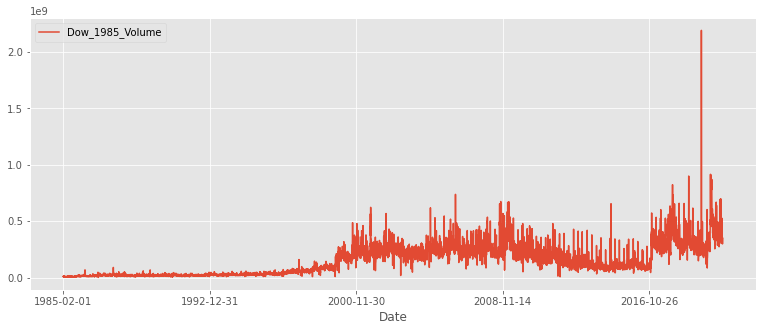

In [25]:
dow_filtered.plot(x='Date', y='Volume', label='Dow_1985_Volume', figsize=(13,5))

<AxesSubplot:xlabel='Date'>

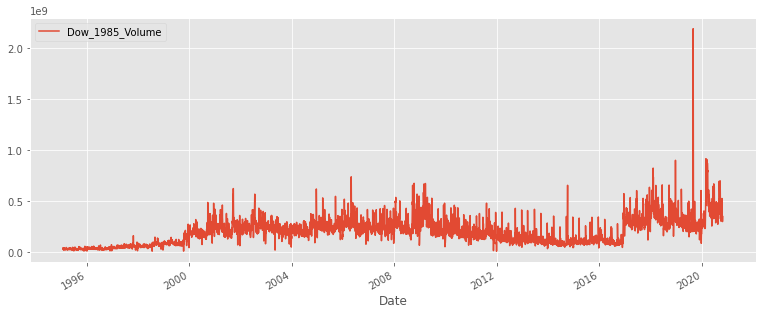

In [26]:
dow_filtered1995.plot(x='Date', y='Volume', label='Dow_1985_Volume', figsize=(13,5))

<AxesSubplot:xlabel='Date'>

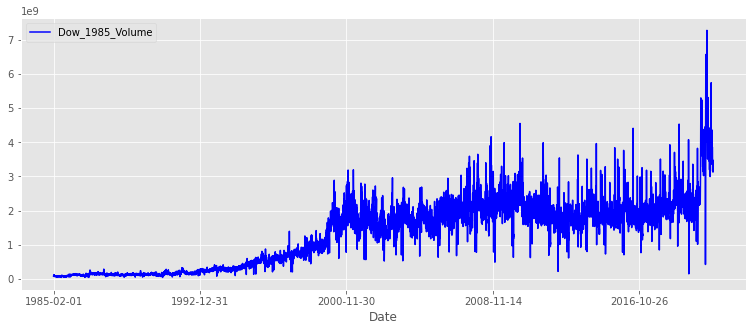

In [27]:
nasdaq_filtered.plot(x='Date', y='Volume', label='Dow_1985_Volume', figsize=(13,5), color="blue")

<AxesSubplot:xlabel='Date'>

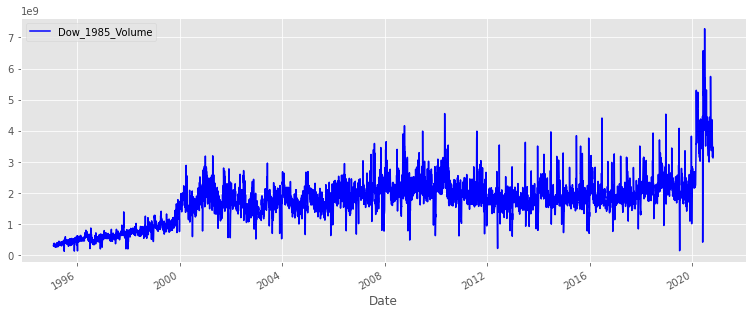

In [28]:
nasdaq_filtered1995.plot(x='Date', y='Volume', label='Dow_1985_Volume', figsize=(13,5), color="blue")

<AxesSubplot:xlabel='Date'>

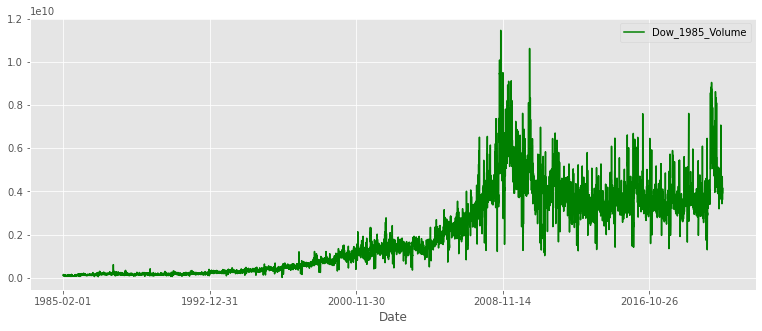

In [29]:
SP500_filtered.plot(x='Date', y='Volume', label='Dow_1985_Volume', figsize=(13,5), color="green")

<AxesSubplot:xlabel='Date'>

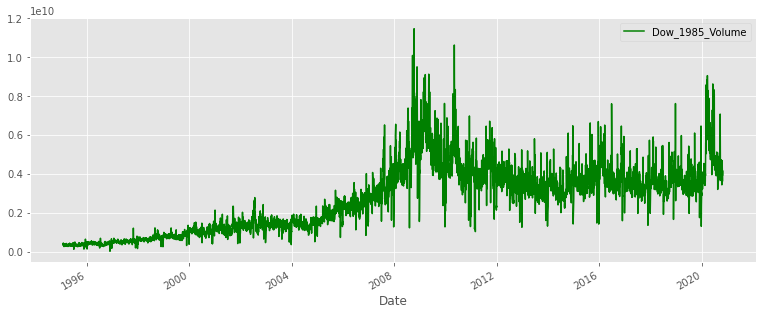

In [30]:
SP500_filtered1995.plot(x='Date', y='Volume', label='Dow_1985_Volume', figsize=(13,5), color="green")

# Exploratory Data Analysis (EDA) - continued

### Dow since 1995 plotting 'Volume' change over time

<AxesSubplot:xlabel='Date'>

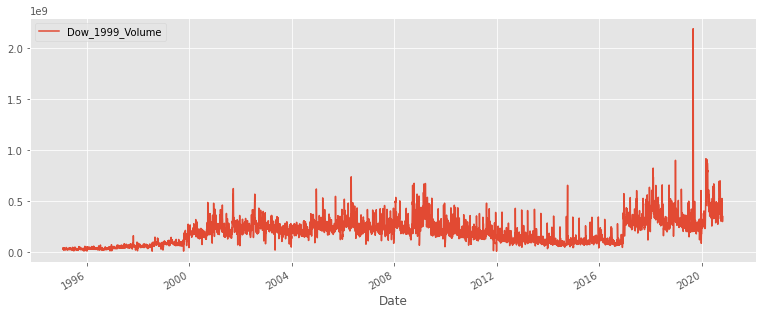

In [31]:
dow_filtered1995.plot(x='Date', y='Volume', label='Dow_1999_Volume', figsize=(13,5))

In [32]:
### Dow since 1985 plotting volume change over time

In [33]:
# dow_filtered.plot(x='Date', y='Adj Close', label='Dow_1985_Adj_Close', figsize=(13,5))

### Dow since 1995 plotting 'Adj Close' change over time

<AxesSubplot:xlabel='Date'>

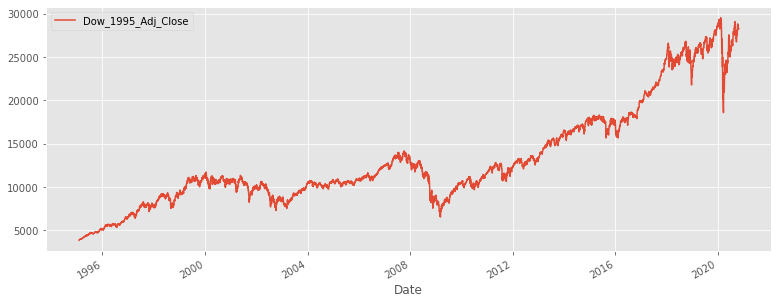

In [34]:
dow_filtered1995.plot(x='Date', y='Adj Close', label='Dow_1995_Adj_Close', figsize=(13,5))

In [35]:
### Dow since 1985 plotting return change over time

In [36]:
# dow_filtered.plot(x='Date', y='Adj Close Daily Returns', label='Dow_1985_VDR', figsize=(13,5))

### Dow since 1995 plotting 'Adj Close Daily Returns'

<AxesSubplot:xlabel='Date'>

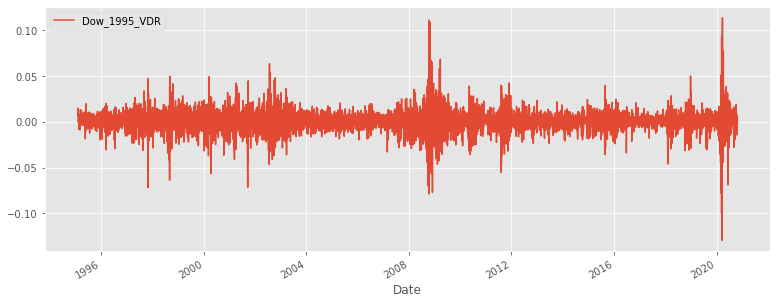

In [37]:
dow_filtered1995.plot(x='Date', y='Adj Close Daily Returns', label='Dow_1995_VDR', figsize=(13,5))

In [38]:
### Dow since 1985 plotting returns change over time

In [39]:
# dow_filtered.plot(x='Date', y='Volume Daily Returns', label='Dow_1985_VDR', figsize=(13,5))

### Dow since 1995 plotting 'Volume Daily Returns' change over time

<AxesSubplot:xlabel='Date'>

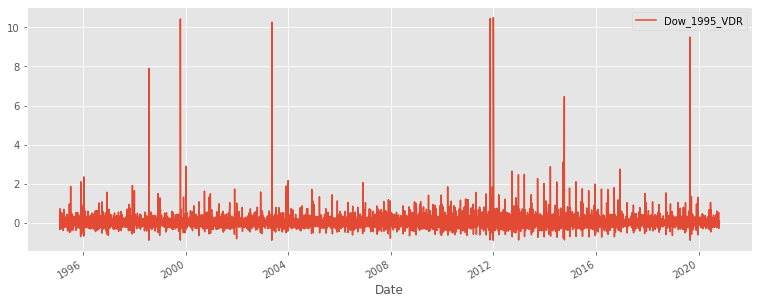

In [40]:
dow_filtered1995.plot(x='Date', y='Volume Daily Returns', label='Dow_1995_VDR', figsize=(13,5))

### Nasdaq since 1995 plotting 'Volume' change over time

<AxesSubplot:xlabel='Date'>

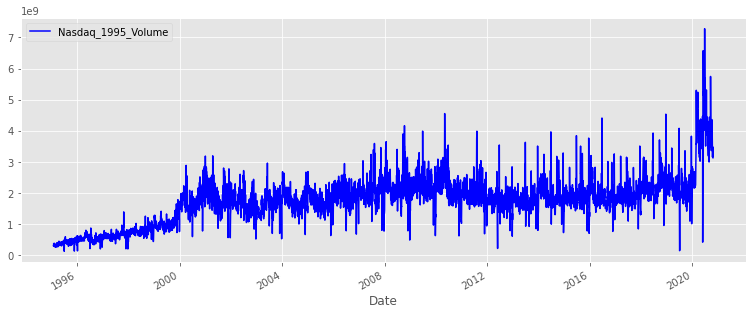

In [41]:
nasdaq_filtered1995.plot(x='Date', y='Volume', label='Nasdaq_1995_Volume', figsize=(13,5), color="blue")

### Nasdaq since 1995 plotting 'Adj Close' change over time

<AxesSubplot:xlabel='Date'>

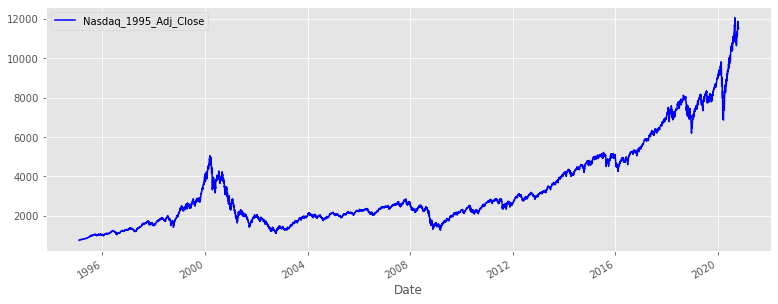

In [42]:
nasdaq_filtered1995.plot(x='Date', y='Adj Close', label='Nasdaq_1995_Adj_Close', figsize=(13,5), color="blue")

### Nasdaq since 1995 plotting 'Adj Close Daily Returns' change over time

<AxesSubplot:xlabel='Date'>

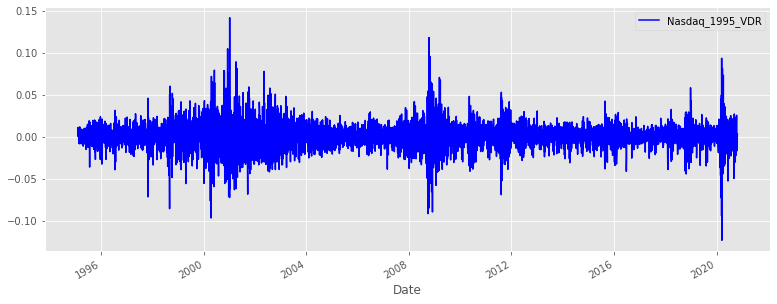

In [43]:
nasdaq_filtered1995.plot(x='Date', y='Adj Close Daily Returns', label='Nasdaq_1995_VDR', figsize=(13,5), color="blue")

### Nasdaq since 1995 plotting 'Volume Daily Returns' change over time

<AxesSubplot:xlabel='Date'>

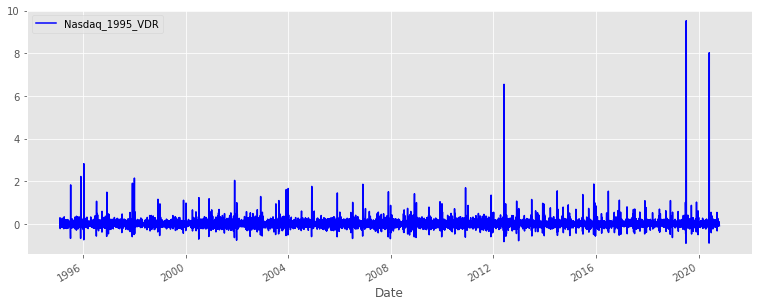

In [44]:
nasdaq_filtered1995.plot(x='Date', y='Volume Daily Returns', label='Nasdaq_1995_VDR', figsize=(13,5), color="blue")

### S&P500 since 1995 plotting 'Volume' change over time

<AxesSubplot:xlabel='Date'>

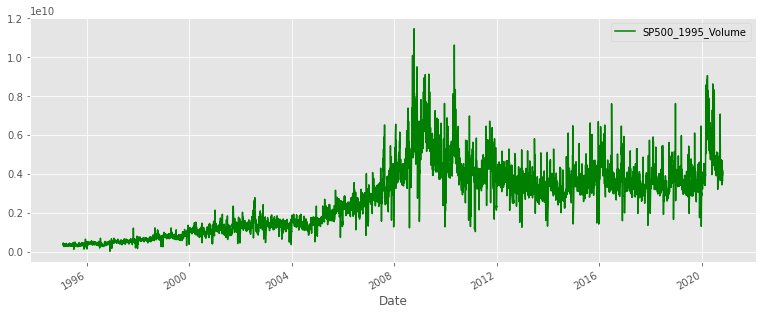

In [45]:
SP500_filtered1995.plot(x='Date', y='Volume', label='SP500_1995_Volume', figsize=(13,5), color="green")

### S&P500  since 1995 plotting 'Adj Close' change over time

<AxesSubplot:xlabel='Date'>

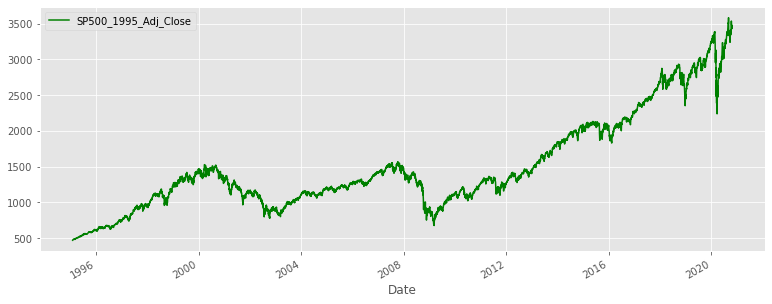

In [46]:
SP500_filtered1995.plot(x='Date', y='Adj Close', label='SP500_1995_Adj_Close', figsize=(13,5), color="green")

### S&P500  since 1995 plotting 'Adj Close Daily Returns' change over time

<AxesSubplot:xlabel='Date'>

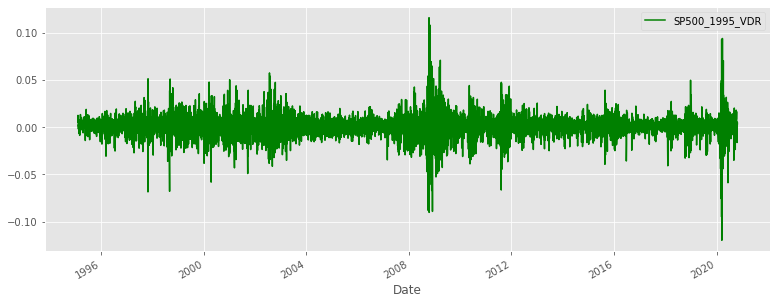

In [47]:
SP500_filtered1995.plot(x='Date', y='Adj Close Daily Returns', label='SP500_1995_VDR', figsize=(13,5), color="green")

### S&P500  since 1995 plotting 'Volume Daily Returns' change over time

<AxesSubplot:xlabel='Date'>

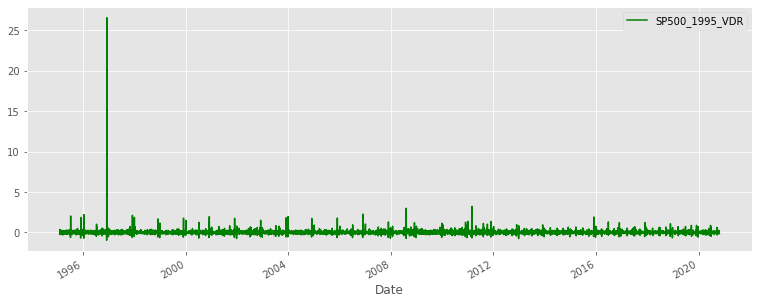

In [48]:
SP500_filtered1995.plot(x='Date', y='Volume Daily Returns', label='SP500_1995_VDR', figsize=(13,5), color="green")

### ^^ Dow Jones, Nasdaq, S&P500 'Adj Close', 'Volume', 'Adj Close Daily Returns', 'Volume Daily Returns' ^^

# Statistic Analysis and more EDA

### Dow since 1995 plotting for daily return for 'volume' and 'adj close'

(-0.1, 0.1)

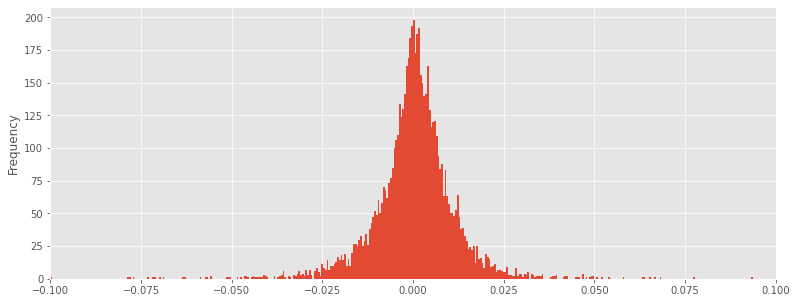

In [49]:
dow_filtered1995['Adj Close Daily Returns'].plot.hist(bins=500, figsize=(13, 5))
plt.xlim(-0.1, 0.1)

(-2.0, 2.0)

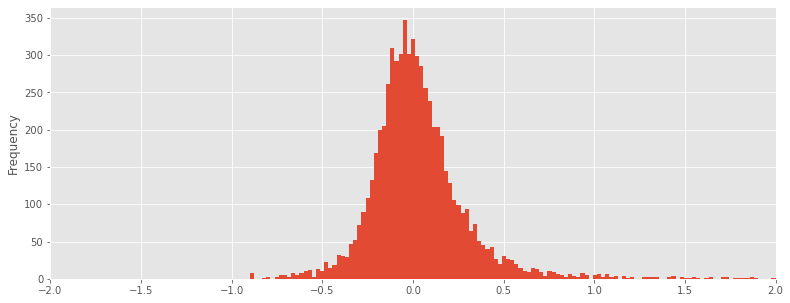

In [50]:
dow_filtered1995['Volume Daily Returns'].plot.hist(bins=500, figsize=(13, 5))
plt.xlim(-2, 2)

### Nasdaq since 1995 plotting for daily return for 'volume' and 'adj close'

(-0.1, 0.1)

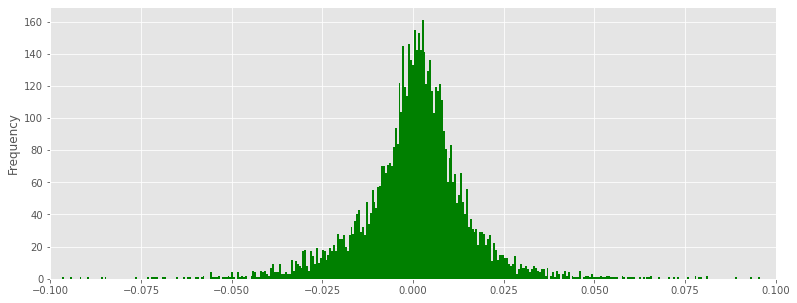

In [51]:
nasdaq_filtered1995['Adj Close Daily Returns'].plot.hist(bins=500, figsize=(13, 5), color='green')
plt.xlim(-0.1, 0.1)

(-2.0, 2.0)

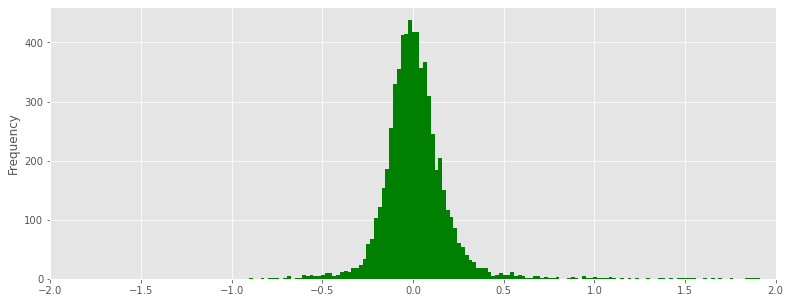

In [52]:
nasdaq_filtered1995['Volume Daily Returns'].plot.hist(bins=500, figsize=(13, 5), color='green')
plt.xlim(-2, 2)

### S&P500 since 1995 plotting for daily return for 'volume' and 'adj close'

(-0.1, 0.1)

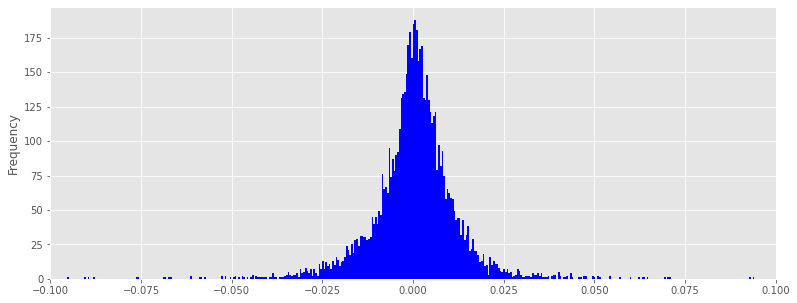

In [53]:
SP500_filtered1995['Adj Close Daily Returns'].plot.hist(bins=500, figsize=(13, 5), color='blue')
plt.xlim(-0.1, 0.1)

(-2.0, 2.0)

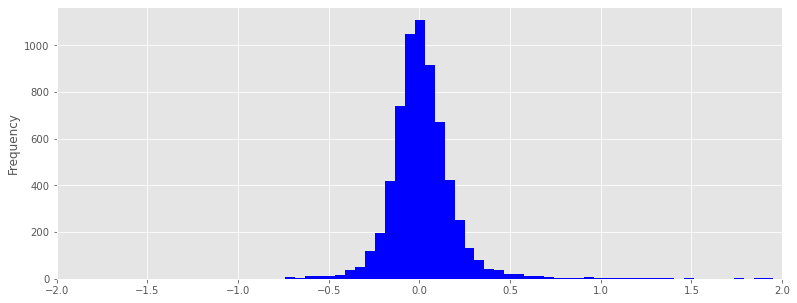

In [54]:
SP500_filtered1995['Volume Daily Returns'].plot.hist(bins=500, figsize=(13, 5), color='blue')
plt.xlim(-2, 2)

In [55]:
# # maybe look into what this can represent? relevant?
# dow_filtered1995['Close'].plot.hist(bins=250, figsize=(13, 5))

In [56]:
# # maybe look into what this can represent? relevant?
# nasdaq_filtered1995['Close'].plot.hist(bins=250, figsize=(13, 5), color='green')

In [57]:
# # maybe look into what this can represent? relevant?
# SP500_filtered1995['Close'].plot.hist(bins=250, figsize=(13, 5), color='blue')

##  Statistic Funtions 

### Welch's Test, Degrees of Freedom, p-value, Upper/Lower bounds

In [58]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + \
                        (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [59]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [60]:
d_null_hyp = {}

def p_value_d(val, d_null_hyp=d_null_hyp):

    if val == 0:
        pass
    else:
        if val in d_null_hyp:
            d_null_hyp[val] += 1 
        else:
            d_null_hyp[val] = 1 
    return d_null_hyp
        

In [61]:
# z_value = 1.645 # 90% confidence
# z_value = 1.96 # 95% confidence
# z_value = 2.58 # 99% confidence

In [62]:
# def find_lu(x):
#     # lower and upper bounds
#     lower, upper = (mean_dowx-((z_value*(std_dowx))/np.sqrt(len(x['Adj Close Daily Returns']))), 
#                     (mean_dowx+(z_value*(std_dowx))/np.sqrt(len(x['Adj Close Daily Returns']))))
#     return lower, upper

#  President time frames before & after election for Dow

# Clinton 

In [63]:
# Year leading up to election and two months after inauguration
clintonbefore1 = dow_filtered1995.loc[dow_filtered1995['Date']>=clinton_campaign].copy()
clintonbefore1 = clintonbefore1.loc[clintonbefore1['Date']<=clinton_inauguration]
# clintonbefore1

In [64]:
# Two months after inauguration with a long year span of data
clintonafter1 = dow_filtered1995.loc[dow_filtered1995['Date']>=clinton_after_inaug].copy()
clintonafter1 = clintonafter1.loc[clintonafter1['Date']<=clinton_year_after]
# clintonafter1

In [65]:
# Combination of Year leading up to election and year after inauguration
clintonwhole1 = dow_filtered1995.loc[dow_filtered1995['Date']>=clinton_campaign].copy()
clintonwhole1 = clintonwhole1.loc[clintonwhole1['Date']<=clinton_year_after]
# clintonwhole1

In [66]:
# welchs t-test
t_test_clinton=welch_test_statistic(clintonbefore1['Volume'], clintonafter1['Volume'])
print("Welch's t-Test: {:2.5f}".format(t_test_clinton))

Welch's t-Test: -21.45409


In [67]:
# welch_satterhwaithe_df
df_clinton = welch_satterhwaithe_df(clintonbefore1['Volume'], clintonafter1['Volume'])
print("Degrees of Freedom for Welch's Test: {:2.3f}".format(df_clinton))

Degrees of Freedom for Welch's Test: 512.194


In [68]:
# 'students' and p-value for respective analysis
students_clinton = stats.t(df_clinton) 
p_value_clinton = students_clinton.cdf(t_test_clinton) + (1 - students_clinton.cdf(-t_test_clinton))

aa=''
if p_value_clinton < 0.01:
    aa = 'P-value failed to Reject our Null Hypotheses'
else:
    aa = 'P-value rejects our Null Hypotheses'
        
p_value_d(aa)
print("p-value: {}, {}".format(p_value_clinton, aa))

p-value: 1.2564398928086832e-73, P-value failed to Reject our Null Hypotheses


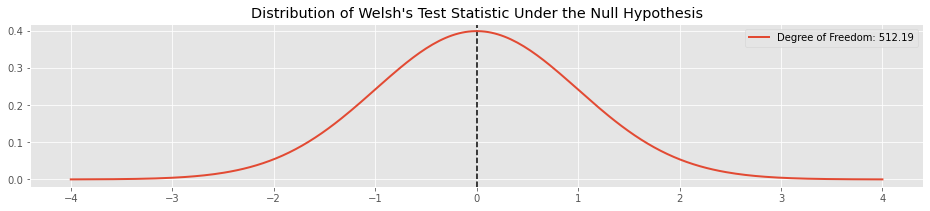

In [69]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis for respective analysis
x = np.linspace(-4, 4, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
plt.axvline(x=p_value_clinton, color='black', linestyle='dashed')
ax.plot(x, students_clinton.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df_clinton))
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x >= -t_test_clinton), color="black", alpha=0.99)
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x <= t_test_clinton), color="black", alpha=0.99)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

In [70]:
# Mean, STD, Variance
mean_dow_clinton = np.mean(clintonwhole1['Adj Close Daily Returns'])
std_dow_clinton = np.std(clintonwhole1['Adj Close Daily Returns'])

# var_dow_clinton = statistics.variance(clintonwhole1['Adj Close Daily Returns'])
var_dow_clinton = clintonwhole1['Adj Close Daily Returns'].var()
print('Dow for ''Adj Close Daily Returns''')
print(f"Mean: {mean_dow_clinton}, \nSTD: {std_dow_clinton}, \nVarience: {var_dow_clinton}")

Dow for Adj Close Daily Returns
Mean: 0.001015115045423768, 
STD: 0.009674023517548432, 
Varience: 9.374219070415666e-05


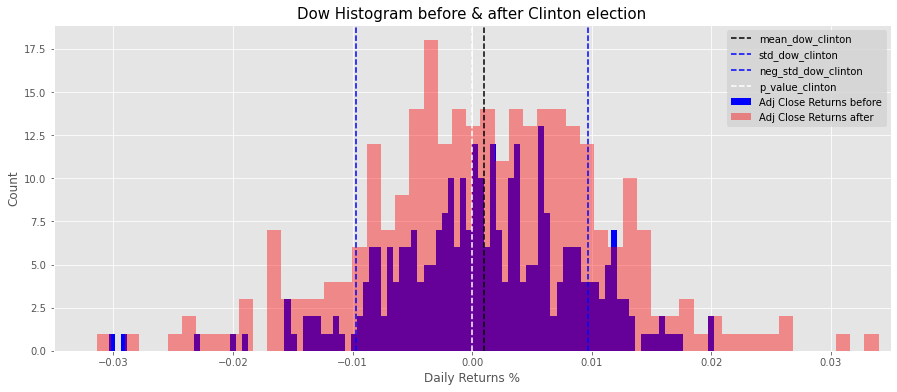

In [71]:
# Plotting of before and after election periods for respective president 
clintonbefore1['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns before', color='blue', alpha=1)
clintonafter1['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns after', color='red', alpha=0.4)

plt.axvline(x=mean_dow_clinton, color='black', linestyle='dashed', label='mean_dow_clinton')
plt.axvline(x=std_dow_clinton, color='blue', linestyle='dashed', label='std_dow_clinton')
plt.axvline(x=-std_dow_clinton, color='blue', linestyle='dashed', label='neg_std_dow_clinton')
plt.axvline(x=p_value_clinton, color='white', linestyle='dashed', label='p_value_clinton')

plt.title("Dow Histogram before & after Clinton election", size=15)
plt.xlabel("Daily Returns %", size=12)
plt.xlim(-0.035, 0.035)
plt.ylabel("Count", size=12)

plt.legend(fontsize=14, loc='upper right')
legend= plt.legend()
frame = legend.get_frame()
frame.set_facecolor('lightgrey')


# Bush Term 1

In [72]:
# Year leading up to election and two months after inauguration
bushbefore1 = dow_filtered1995.loc[dow_filtered1995['Date']>=bush_campaign1].copy()
bushbefore1 = bushbefore1.loc[bushbefore1['Date']<=bush_inauguration1]
# bushbefore1

In [73]:
# Two months after inauguration with a long year span of data
bushafter1 = dow_filtered1995.loc[dow_filtered1995['Date']>=bush_after_inaug1].copy()
bushafter1 = bushafter1.loc[bushafter1['Date']<=bush_year_after1]
# bushafter1

In [74]:
# Combination of Year leading up to election and year after inauguration
bushwhole1 = dow_filtered1995.loc[dow_filtered1995['Date']>=bush_campaign1].copy()
bushwhole1 = bushwhole1.loc[bushwhole1['Date']<=bush_year_after1]
# bushwhole1

In [75]:
# welchs t-test
t_test_bush1=welch_test_statistic(bushbefore1['Volume'], bushafter1['Volume'])
print("Welch's t-Test: {:2.5f}".format(t_test_bush1))

Welch's t-Test: -4.76911


In [76]:
# welch_satterhwaithe_df
df_bush1 = welch_satterhwaithe_df(bushbefore1['Volume'], bushafter1['Volume'])
print("Degrees of Freedom for Welch's Test: {:2.3f}".format(df_bush1))

Degrees of Freedom for Welch's Test: 587.989


In [77]:
# 'students' and p-value for respective analysis
students_bush1 = stats.t(df_bush1) 
p_value_bush1 = students_bush1.cdf(t_test_bush1) + (1 - students_bush1.cdf(-t_test_bush1))

aa=''
if p_value_bush1 < 0.01:
    aa = 'P-value failed to Reject our Null Hypotheses'
else:
    aa = 'P-value rejects our Null Hypotheses'
        
p_value_d(aa)
print("p-value: {}, {}".format(p_value_bush1, aa))

p-value: 2.3361135587877515e-06, P-value failed to Reject our Null Hypotheses


In [78]:
# Mean, STD, Variance
mean_dow_bush1 = np.mean(bushwhole1['Adj Close Daily Returns'])
std_dow_bush1 = np.std(bushwhole1['Adj Close Daily Returns'])

# var_dow_clinton = statistics.variance(clintonwhole1['Adj Close Daily Returns'])
var_dow_bush1 = bushwhole1['Adj Close Daily Returns'].var()
print('Dow for ''Adj Close Daily Returns''')
print(f"Mean: {mean_dow_bush1}, \nSTD: {std_dow_bush1}, \nVarience: {var_dow_bush1}")

Dow for Adj Close Daily Returns
Mean: -0.00011231051719292167, 
STD: 0.01291741154121767, 
Varience: 0.0001671399570948056


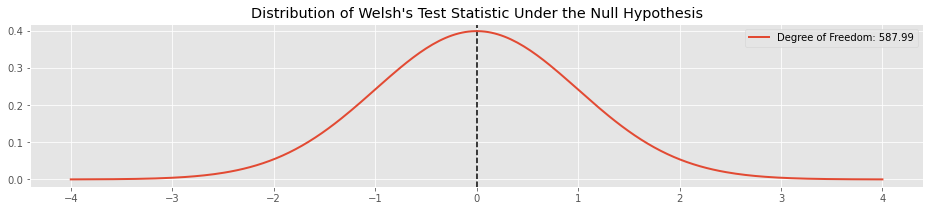

In [79]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis for respective analysis
x = np.linspace(-4, 4, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
plt.axvline(x=p_value_bush1, color='black', linestyle='dashed')
ax.plot(x, students_bush1.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df_bush1))
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x >= -t_test_clinton), color="black", alpha=0.99)
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x <= t_test_clinton), color="black", alpha=0.99)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

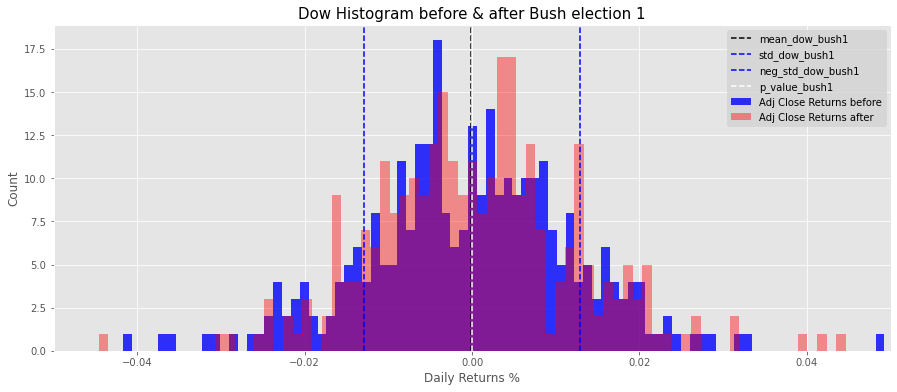

In [80]:
# Plotting of before and after election periods for respective president 
bushbefore1['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns before', color='blue', alpha=0.8)
bushafter1['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns after', color='red', alpha=0.4)

plt.axvline(x=mean_dow_bush1, color='black', linestyle='dashed', label='mean_dow_bush1')
plt.axvline(x=std_dow_bush1, color='blue', linestyle='dashed', label='std_dow_bush1')
plt.axvline(x=-std_dow_bush1, color='blue', linestyle='dashed', label='neg_std_dow_bush1')
plt.axvline(x=p_value_bush1, color='white', linestyle='dashed', label='p_value_bush1')

plt.title("Dow Histogram before & after Bush election 1", size=15)
plt.xlabel("Daily Returns %", size=12)
plt.xlim(-0.05, 0.05)
plt.ylabel("Count", size=12)

plt.legend(fontsize=14, loc='upper right')
legend= plt.legend()
frame = legend.get_frame()
frame.set_facecolor('lightgrey')


# Bush Term 2 

In [81]:
# Year leading up to election and two months after inauguration
bushbefore2 = dow_filtered1995.loc[dow_filtered1995['Date']>=bush_campaign2].copy()
bushbefore2 = bushbefore2.loc[bushbefore2['Date']<=bush_inauguration2]
# bushbefore2

In [82]:
# Two months after inauguration with a long year span of data
bushafter2 = dow_filtered1995.loc[dow_filtered1995['Date']>=bush_after_inaug2].copy()
bushafter2 = bushafter2.loc[bushafter2['Date']<=bush_year_after2]
# bushafter2

In [83]:
# Combination of Year leading up to election and year after inauguration
bushwhole2 = dow_filtered1995.loc[dow_filtered1995['Date']>=bush_campaign2].copy()
bushwhole2 = bushwhole2.loc[bushwhole2['Date']<=bush_year_after2]
# bushwhole2

In [84]:
# welchs t-test
t_test_bush2=welch_test_statistic(bushbefore2['Volume'], bushafter2['Volume'])
print("Welch's t-Test: {:2.5f}".format(t_test_bush2))

Welch's t-Test: -8.11777


In [85]:
# welch_satterhwaithe_df
df_bush2 = welch_satterhwaithe_df(bushbefore2['Volume'], bushafter2['Volume'])
print("Degrees of Freedom for Welch's Test: {:2.3f}".format(df_bush2))

Degrees of Freedom for Welch's Test: 574.735


In [86]:
# 'students' and p-value for respective analysis
students_bush2 = stats.t(df_bush2) 
p_value_bush2 = students_bush2.cdf(t_test_bush2) + (1 - students_bush2.cdf(-t_test_bush2))

aa=''
if p_value_clinton < 0.01:
    aa = 'P-value failed to Reject our Null Hypotheses'
else:
    aa = 'P-value rejects our Null Hypotheses'
        
p_value_d(aa)
print("p-value: {}, {}".format(p_value_bush2, aa))

p-value: 2.8937447082735384e-15, P-value failed to Reject our Null Hypotheses


In [87]:
# Mean, STD, Variance
mean_dow_bush2 = np.mean(bushwhole2['Adj Close Daily Returns'])
std_dow_bush2 = np.std(bushwhole2['Adj Close Daily Returns'])

# var_dow_clinton = statistics.variance(clintonwhole1['Adj Close Daily Returns'])
var_dow_bush2 = bushwhole2['Adj Close Daily Returns'].var()
print('Dow for ''Adj Close Daily Returns''')
print(f"Mean: {mean_dow_bush2}, \nSTD: {std_dow_bush2}, \nVarience: {var_dow_bush2}")

Dow for Adj Close Daily Returns
Mean: 0.00012818535376406037, 
STD: 0.0065770573884730175, 
Varience: 4.3329900391920715e-05


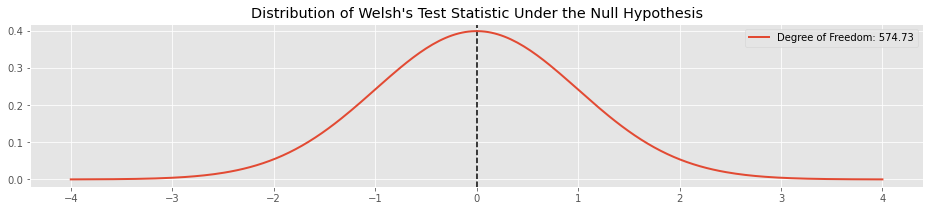

In [88]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis for respective analysis
x = np.linspace(-4, 4, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
plt.axvline(x=p_value_bush2, color='black', linestyle='dashed')
ax.plot(x, students_bush2.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df_bush2))
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x >= -t_test_clinton), color="black", alpha=0.99)
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x <= t_test_clinton), color="black", alpha=0.99)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

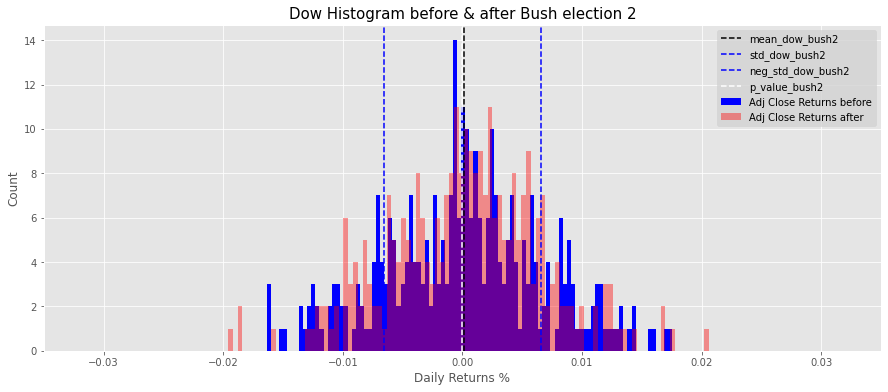

In [89]:
# Plotting of before and after election periods for respective president 
bushbefore2['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns before', color='blue', alpha=1)
bushafter2['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns after', color='red', alpha=0.4)

plt.axvline(x=mean_dow_bush2, color='black', linestyle='dashed', label='mean_dow_bush2')
plt.axvline(x=std_dow_bush2, color='blue', linestyle='dashed', label='std_dow_bush2')
plt.axvline(x=-std_dow_bush2, color='blue', linestyle='dashed', label='neg_std_dow_bush2')
plt.axvline(x=p_value_bush2, color='white', linestyle='dashed', label='p_value_bush2')

plt.title("Dow Histogram before & after Bush election 2", size=15)
plt.xlabel("Daily Returns %", size=12)
plt.xlim(-0.035, 0.035)
plt.ylabel("Count", size=12)

plt.legend(fontsize=14, loc='upper right')
legend= plt.legend()
frame = legend.get_frame()
frame.set_facecolor('lightgrey')


# Obama Term 1

In [90]:
# Year leading up to election and two months after inauguration
obamabefore1 = dow_filtered1995.loc[dow_filtered1995['Date']>=obama_campaign1].copy()
obamabefore1 = obamabefore1.loc[obamabefore1['Date']<=obama_inauguration1]
# obamabefore1

In [91]:
# Two months after inauguration with a long year span of data
obamaafter1 = dow_filtered1995.loc[dow_filtered1995['Date']>=obama_after_inaug1].copy()
obamaafter1 = obamaafter1.loc[obamaafter1['Date']<=obama_year_after1]
# obamaafter1

In [92]:
# Combination of Year leading up to election and year after inauguration
obamawhole1 = dow_filtered1995.loc[dow_filtered1995['Date']>=obama_campaign1].copy()
obamawhole1 = obamawhole1.loc[obamawhole1['Date']<=obama_year_after1]
# obamawhole1

In [93]:
# welchs t-test
t_test_obama1=welch_test_statistic(obamabefore1['Volume'], obamaafter1['Volume'])
print("Welch's t-Test: {:2.5f}".format(t_test_obama1))

Welch's t-Test: 6.80100


In [94]:
# welch_satterhwaithe_df
df_obama1 = welch_satterhwaithe_df(obamabefore1['Volume'], obamaafter1['Volume'])
print("Degrees of Freedom for Welch's Test: {:2.3f}".format(df_obama1))

Degrees of Freedom for Welch's Test: 584.774


In [95]:
# 'students' and p-value for respective analysis
students_obama1 = stats.t(df_obama1) 
p_value_obama1 = students_obama1.cdf(t_test_obama1) + (1 - students_obama1.cdf(-t_test_obama1))

aa=''
if p_value_obama1 < 0.01:
    aa = 'P-value failed to Reject our Null Hypotheses'
else:
    aa = 'P-value rejects our Null Hypotheses'
        
p_value_d(aa)
print("p-value: {}, {}".format(p_value_obama1, aa))

p-value: 1.9999999999742721, P-value rejects our Null Hypotheses


In [96]:
# Mean, STD, Variance
mean_dow_obama1 = np.mean(obamawhole1['Adj Close Daily Returns'])
std_dow_obama1 = np.std(obamawhole1['Adj Close Daily Returns'])

# var_dow_clinton = statistics.variance(clintonwhole1['Adj Close Daily Returns'])
var_dow_obama1 = obamawhole1['Adj Close Daily Returns'].var()
print('Dow for ''Adj Close Daily Returns''')
print(f"Mean: {mean_dow_obama1}, \nSTD: {std_dow_obama1}, \nVarience: {var_dow_obama1}")

Dow for Adj Close Daily Returns
Mean: -0.000281837490252751, 
STD: 0.018830985448329167, 
Varience: 0.00035519702297677686


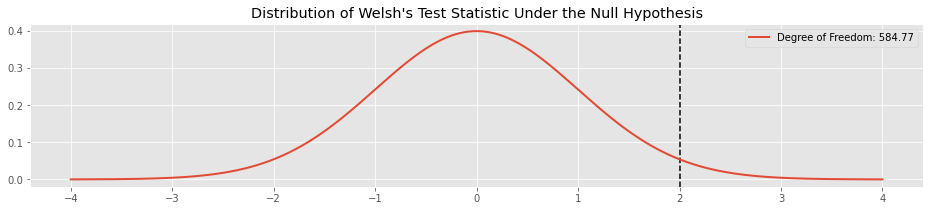

In [97]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis for respective analysis
x = np.linspace(-4, 4, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
plt.axvline(x=p_value_obama1, color='black', linestyle='dashed')
ax.plot(x, students_obama1.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df_obama1))
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x >= -t_test_clinton), color="black", alpha=0.99)
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x <= t_test_clinton), color="black", alpha=0.99)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

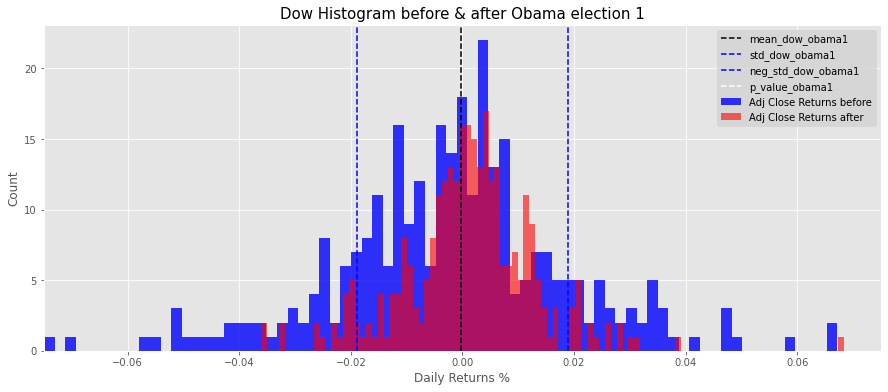

In [98]:
# Plotting of before and after election periods for respective president 
obamabefore1['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns before', color='blue', alpha=0.8)
obamaafter1['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns after', color='red', alpha=0.6)

plt.axvline(x=mean_dow_obama1, color='black', linestyle='dashed', label='mean_dow_obama1')
plt.axvline(x=std_dow_obama1, color='blue', linestyle='dashed', label='std_dow_obama1')
plt.axvline(x=-std_dow_obama1, color='blue', linestyle='dashed', label='neg_std_dow_obama1')
plt.axvline(x=p_value_obama1, color='white', linestyle='dashed', label='p_value_obama1')

plt.title("Dow Histogram before & after Obama election 1", size=15)
plt.xlabel("Daily Returns %", size=12)
plt.xlim(-0.075, 0.075)
plt.ylabel("Count", size=12)

plt.legend(fontsize=14, loc='upper right')
legend= plt.legend()
frame = legend.get_frame()
frame.set_facecolor('lightgrey')


# Obama Term 2

In [99]:
# Year leading up to election and two months after inauguration
obamabefore2 = dow_filtered1995.loc[dow_filtered1995['Date']>=obama_campaign2].copy()
obamabefore2 = obamabefore2.loc[obamabefore2['Date']<=obama_inauguration2]
# obamabefore2

In [100]:
# Two months after inauguration with a long year span of data
obamaafter2 = dow_filtered1995.loc[dow_filtered1995['Date']>=obama_after_inaug2].copy()
obamaafter2 = obamaafter2.loc[obamaafter2['Date']<=obama_year_after2]
# obamaafter2

In [101]:
# Combination of Year leading up to election and year after inauguration
obamawhole2 = dow_filtered1995.loc[dow_filtered1995['Date']>=obama_campaign2].copy()
obamawhole2 = obamawhole2.loc[obamawhole2['Date']<=obama_year_after2]
# obamawhole2

In [102]:
# welchs t-test
t_test_obama2=welch_test_statistic(obamabefore2['Volume'], obamaafter2['Volume'])
print("Welch's t-Test: {:2.5f}".format(t_test_obama2))

Welch's t-Test: 1.43767


In [103]:
# welch_satterhwaithe_df
df_obama2 = welch_satterhwaithe_df(obamabefore2['Volume'], obamaafter2['Volume'])
print("Degrees of Freedom for Welch's Test: {:2.3f}".format(df_obama2))

Degrees of Freedom for Welch's Test: 86.275


In [104]:
# 'students' and p-value for respective analysis
students_obama2 = stats.t(df_obama2) 
p_value_obama2 = students_obama2.cdf(t_test_obama2) + (1 - students_obama2.cdf(-t_test_obama2))

aa=''
if p_value_obama2 < 0.01:
    aa = 'P-value failed to Reject our Null Hypotheses'
else:
    aa = 'P-value rejects our Null Hypotheses'
        
p_value_d(aa)
print("p-value: {}, {}".format(p_value_obama2, aa))

p-value: 1.8458546445999164, P-value rejects our Null Hypotheses


In [105]:
# Mean, STD, Variance
mean_dow_obama2 = np.mean(obamawhole2['Adj Close Daily Returns'])
std_dow_obama2 = np.std(obamawhole2['Adj Close Daily Returns'])

# var_dow_clinton = statistics.variance(clintonwhole1['Adj Close Daily Returns'])
var_dow_obama2 = obamawhole2['Adj Close Daily Returns'].var()
print('Dow for ''Adj Close Daily Returns''')
print(f"Mean: {mean_dow_obama2}, \nSTD: {std_dow_obama2}, \nVarience: {var_dow_obama2}")

Dow for Adj Close Daily Returns
Mean: 0.0006819856905699393, 
STD: 0.007056696118588704, 
Varience: 4.994129912491678e-05


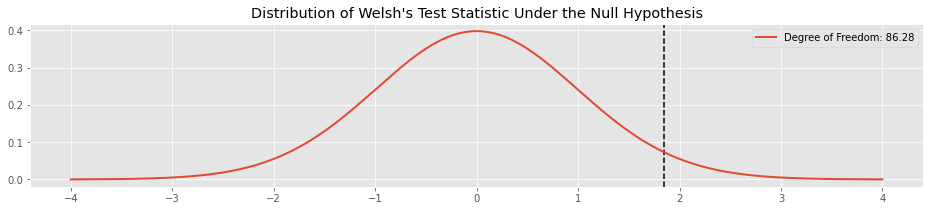

In [106]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis for respective analysis
x = np.linspace(-4, 4, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
plt.axvline(x=p_value_obama2, color='black', linestyle='dashed')
ax.plot(x, students_obama2.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df_obama2))
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x >= -t_test_clinton), color="black", alpha=0.99)
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x <= t_test_clinton), color="black", alpha=0.99)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

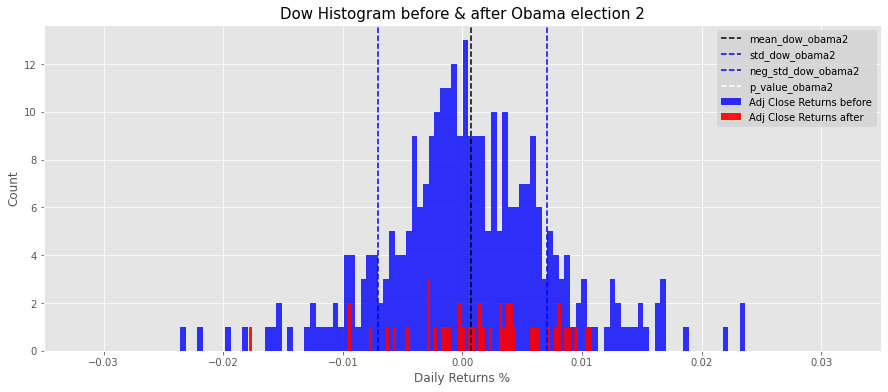

In [107]:
# Plotting of before and after election periods for respective president 
obamabefore2['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns before', color='blue', alpha=0.8)
obamaafter2['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns after', color='red', alpha=0.9)

plt.axvline(x=mean_dow_obama2, color='black', linestyle='dashed', label='mean_dow_obama2')
plt.axvline(x=std_dow_obama2, color='blue', linestyle='dashed', label='std_dow_obama2')
plt.axvline(x=-std_dow_obama2, color='blue', linestyle='dashed', label='neg_std_dow_obama2')
plt.axvline(x=p_value_obama2, color='white', linestyle='dashed', label='p_value_obama2')

plt.title("Dow Histogram before & after Obama election 2", size=15)
plt.xlabel("Daily Returns %", size=12)
plt.xlim(-0.035, 0.035)
plt.ylabel("Count", size=12)

plt.legend(fontsize=14, loc='upper right')
legend= plt.legend()
frame = legend.get_frame()
frame.set_facecolor('lightgrey')


# Trump Term 1

In [108]:
# Year leading up to election and two months after inauguration
trumpbefore1 = dow_filtered1995.loc[dow_filtered1995['Date']>=trump_campaign1].copy()
trumpbefore1 = trumpbefore1.loc[trumpbefore1['Date']<=trump_inauguration1]
# trumpbefore1

In [109]:
# Two months after inauguration with a long year span of data
trumpafter1 = dow_filtered1995.loc[dow_filtered1995['Date']>=trump_after_inaug1].copy()
trumpafter1 = trumpafter1.loc[trumpafter1['Date']<=trump_year_after1]
# clintonafter1

In [110]:
# Combination of Year leading up to election and year after inauguration
trumpwhole1 = dow_filtered1995.loc[dow_filtered1995['Date']>=trump_campaign1].copy()
trumpwhole1 = trumpwhole1.loc[trumpwhole1['Date']<=trump_year_after1]
# clintonwhole1

In [111]:
# welchs t-test
t_test_trump1=welch_test_statistic(trumpbefore1['Volume'], trumpafter1['Volume'])
print("Welch's t-Test: {:2.5f}".format(t_test_trump1))

Welch's t-Test: -23.57453


In [112]:
# welch_satterhwaithe_df
df_trump1 = welch_satterhwaithe_df(trumpbefore1['Volume'], trumpafter1['Volume'])
print("Degrees of Freedom for Welch's Test: {:2.3f}".format(df_trump1))

Degrees of Freedom for Welch's Test: 597.986


In [113]:
# 'students' and p-value for respective analysis
students_trump1 = stats.t(df_trump1) 
p_value_trump1 = students_trump1.cdf(t_test_trump1) + (1 - students_trump1.cdf(-t_test_trump1))

aa=''
if p_value_trump1 < 0.01:
    aa = 'P-value failed to Reject our Null Hypotheses'
else:
    aa = 'P-value rejects our Null Hypotheses'
        
p_value_d(aa)
print("p-value: {}, {}".format(p_value_trump1, aa))

p-value: 1.0766072746945302e-87, P-value failed to Reject our Null Hypotheses


In [114]:
# Mean, STD, Variance
mean_dow_trump1 = np.mean(trumpwhole1['Adj Close Daily Returns'])
std_dow_trump1 = np.std(trumpwhole1['Adj Close Daily Returns'])

# var_dow_clinton = statistics.variance(clintonwhole1['Adj Close Daily Returns'])
var_dow_trump1 = clintonwhole1['Adj Close Daily Returns'].var()
print('Dow for ''Adj Close Daily Returns''')
print(f"Mean: {mean_dow_trump1}, \nSTD: {std_dow_trump1}, \nVarience: {var_dow_trump1}")

Dow for Adj Close Daily Returns
Mean: 0.0006125896376614169, 
STD: 0.007590029842530046, 
Varience: 9.374219070415666e-05


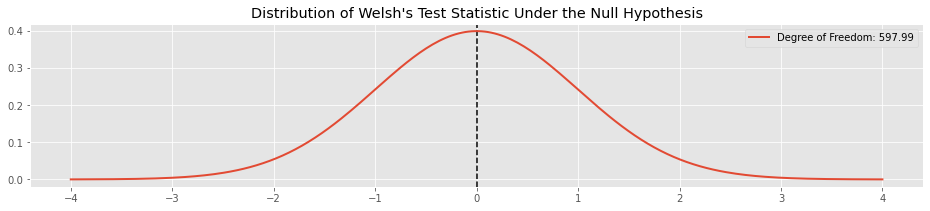

In [115]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis for respective analysis
x = np.linspace(-4, 4, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
plt.axvline(x=p_value_trump1, color='black', linestyle='dashed')
ax.plot(x, students_trump1.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df_trump1))
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x >= -t_test_clinton), color="black", alpha=0.99)
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x <= t_test_clinton), color="black", alpha=0.99)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

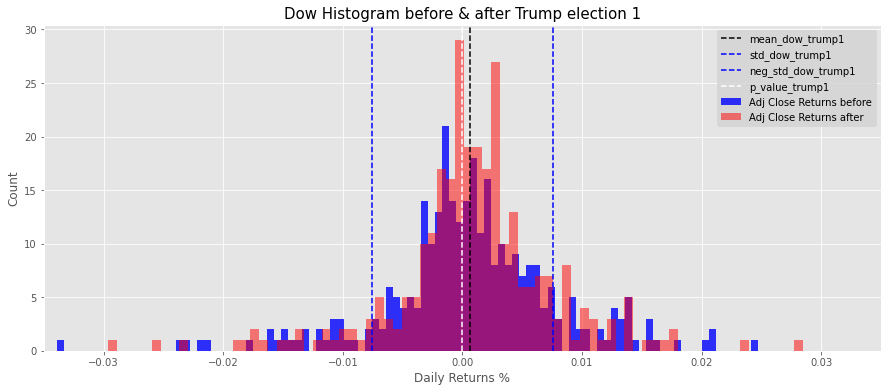

In [116]:
# Plotting of before and after election periods for respective president 
trumpbefore1['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns before', color='blue', alpha=0.8)
trumpafter1['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns after', color='red', alpha=0.5)

plt.axvline(x=mean_dow_trump1, color='black', linestyle='dashed', label='mean_dow_trump1')
plt.axvline(x=std_dow_trump1, color='blue', linestyle='dashed', label='std_dow_trump1')
plt.axvline(x=-std_dow_trump1, color='blue', linestyle='dashed', label='neg_std_dow_trump1')
plt.axvline(x=p_value_trump1, color='white', linestyle='dashed', label='p_value_trump1')

plt.title("Dow Histogram before & after Trump election 1", size=15)
plt.xlabel("Daily Returns %", size=12)
plt.xlim(-0.035, 0.035)
plt.ylabel("Count", size=12)

plt.legend(fontsize=14, loc='upper right')
legend= plt.legend()
frame = legend.get_frame()
frame.set_facecolor('lightgrey')


#  President time frames before & after election for  NASDAQ

# Clinton

In [117]:
# Year leading up to election and two months after inauguration
clintonbefore1 = nasdaq_filtered1995.loc[nasdaq_filtered1995['Date']>=clinton_campaign].copy()
clintonbefore1 = clintonbefore1.loc[clintonbefore1['Date']<=clinton_inauguration]
# clintonbefore1

In [118]:
# Two months after inauguration with a long year span of data
clintonafter1 = nasdaq_filtered1995.loc[nasdaq_filtered1995['Date']>=clinton_after_inaug].copy()
clintonafter1 = clintonafter1.loc[clintonafter1['Date']<=clinton_year_after]
# clintonafter1

In [119]:
# Combination of Year leading up to election and year after inauguration
clintonwhole1 = nasdaq_filtered1995.loc[nasdaq_filtered1995['Date']>=clinton_campaign].copy()
clintonwhole1 = clintonwhole1.loc[clintonwhole1['Date']<=clinton_year_after]
# clintonwhole1

In [120]:
# welchs t-test
t_test_clinton=welch_test_statistic(clintonbefore1['Volume'], clintonafter1['Volume'])
print("Welch's t-Test: {:2.5f}".format(t_test_clinton))

Welch's t-Test: -14.64976


In [121]:
# welch_satterhwaithe_df
df_clinton = welch_satterhwaithe_df(clintonbefore1['Volume'], clintonafter1['Volume'])
print("Degrees of Freedom for Welch's Test: {:2.3f}".format(df_clinton))

Degrees of Freedom for Welch's Test: 559.885


In [122]:
# 'students' and p-value for respective analysis
students_clinton = stats.t(df_clinton) 
p_value_clinton = students_clinton.cdf(t_test_clinton) + (1 - students_clinton.cdf(-t_test_clinton))

aa=''
if p_value_clinton < 0.01:
    aa = 'P-value failed to Reject our Null Hypotheses'
else:
    aa = 'P-value rejects our Null Hypotheses'
        
p_value_d(aa)
print("p-value: {}, {}".format(p_value_clinton, aa))

p-value: 1.1299282909371501e-41, P-value failed to Reject our Null Hypotheses


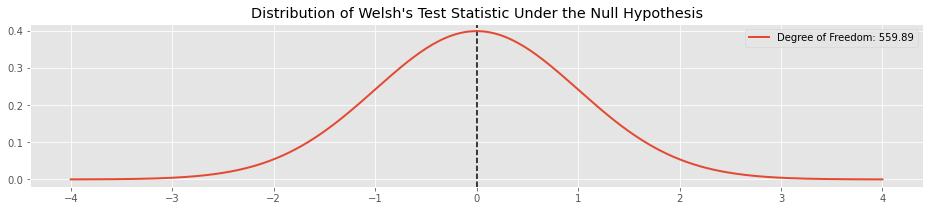

In [123]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis for respective analysis
x = np.linspace(-4, 4, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
plt.axvline(x=p_value_clinton, color='black', linestyle='dashed')
ax.plot(x, students_clinton.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df_clinton))
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x >= -t_test_clinton), color="black", alpha=0.99)
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x <= t_test_clinton), color="black", alpha=0.99)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

In [124]:
# Mean, STD, Variance
mean_dow_clinton = np.mean(clintonwhole1['Adj Close Daily Returns'])
std_dow_clinton = np.std(clintonwhole1['Adj Close Daily Returns'])

# var_dow_clinton = statistics.variance(clintonwhole1['Adj Close Daily Returns'])
var_dow_clinton = clintonwhole1['Adj Close Daily Returns'].var()
print('NASDAQ for ''Adj Close Daily Returns''')
print(f"Mean: {mean_dow_clinton}, \nSTD: {std_dow_clinton}, \nVarience: {var_dow_clinton}")

NASDAQ for Adj Close Daily Returns
Mean: 0.0009767740508806544, 
STD: 0.010640060137913836, 
Varience: 0.00011339893767818784


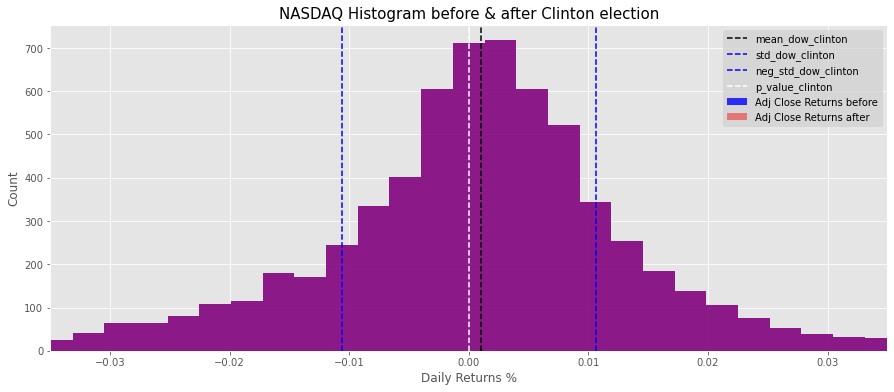

In [125]:
# Plotting of before and after election periods for respective president 
nasdaq_filtered1995['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns before', color='blue', alpha=0.8)
nasdaq_filtered1995['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns after', color='red', alpha=0.45)

plt.axvline(x=mean_dow_clinton, color='black', linestyle='dashed', label='mean_dow_clinton')
plt.axvline(x=std_dow_clinton, color='blue', linestyle='dashed', label='std_dow_clinton')
plt.axvline(x=-std_dow_clinton, color='blue', linestyle='dashed', label='neg_std_dow_clinton')
plt.axvline(x=p_value_clinton, color='white', linestyle='dashed', label='p_value_clinton')

plt.title("NASDAQ Histogram before & after Clinton election", size=15)
plt.xlabel("Daily Returns %", size=12)
plt.xlim(-0.035, 0.035)
plt.ylabel("Count", size=12)

plt.legend(fontsize=14, loc='upper right')
legend= plt.legend()
frame = legend.get_frame()
frame.set_facecolor('lightgrey')

# Bush Term 1

In [126]:
# Year leading up to election and two months after inauguration
bushbefore1 = nasdaq_filtered1995.loc[nasdaq_filtered1995['Date']>=bush_campaign1].copy()
bushbefore1 = bushbefore1.loc[bushbefore1['Date']<=bush_inauguration1]
# bushbefore1

In [127]:
# Two months after inauguration with a long year span of data
bushafter1 = nasdaq_filtered1995.loc[nasdaq_filtered1995['Date']>=bush_after_inaug1].copy()
bushafter1 = bushafter1.loc[bushafter1['Date']<=bush_year_after1]
# bushafter1

In [128]:
# Combination of Year leading up to election and year after inauguration
bushwhole1 = nasdaq_filtered1995.loc[nasdaq_filtered1995['Date']>=bush_campaign1].copy()
bushwhole1 = bushwhole1.loc[bushwhole1['Date']<=bush_year_after1]
# bushwhole1

In [129]:
# welchs t-test
t_test_bush1=welch_test_statistic(bushbefore1['Volume'], bushafter1['Volume'])
print("Welch's t-Test: {:2.5f}".format(t_test_bush1))

Welch's t-Test: -0.40012


In [130]:
# welch_satterhwaithe_df
df_bush1 = welch_satterhwaithe_df(bushbefore1['Volume'], bushafter1['Volume'])
print("Degrees of Freedom for Welch's Test: {:2.3f}".format(df_bush1))

Degrees of Freedom for Welch's Test: 594.971


In [131]:
# 'students' and p-value for respective analysis
students_bush1 = stats.t(df_bush1) 
p_value_bush1 = students_bush1.cdf(t_test_bush1) + (1 - students_bush1.cdf(-t_test_bush1))

aa=''
if p_value_bush1 < 0.01:
    aa = 'P-value failed to Reject our Null Hypotheses'
else:
    aa = 'P-value rejects our Null Hypotheses'
        
p_value_d(aa)
print("p-value: {}, {}".format(p_value_bush1, aa))

p-value: 0.6892120555974903, P-value rejects our Null Hypotheses


In [132]:
# Mean, STD, Variance
mean_dow_bush1 = np.mean(bushwhole1['Adj Close Daily Returns'])
std_dow_bush1 = np.std(bushwhole1['Adj Close Daily Returns'])

# var_dow_clinton = statistics.variance(clintonwhole1['Adj Close Daily Returns'])
var_dow_bush1 = bushwhole1['Adj Close Daily Returns'].var()
print('NASDAQ for ''Adj Close Daily Returns''')
print(f"Mean: {mean_dow_bush1}, \nSTD: {std_dow_bush1}, \nVarience: {var_dow_bush1}")

NASDAQ for Adj Close Daily Returns
Mean: -0.0010779758889062122, 
STD: 0.027780146978960644, 
Varience: 0.0007730336024183245


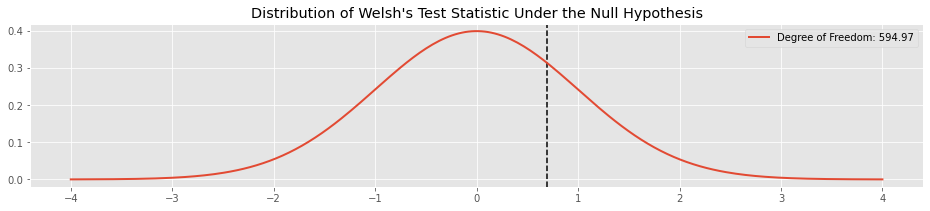

In [133]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis for respective analysis
x = np.linspace(-4, 4, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
plt.axvline(x=p_value_bush1, color='black', linestyle='dashed')
ax.plot(x, students_bush1.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df_bush1))
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x >= -t_test_clinton), color="black", alpha=0.99)
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x <= t_test_clinton), color="black", alpha=0.99)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

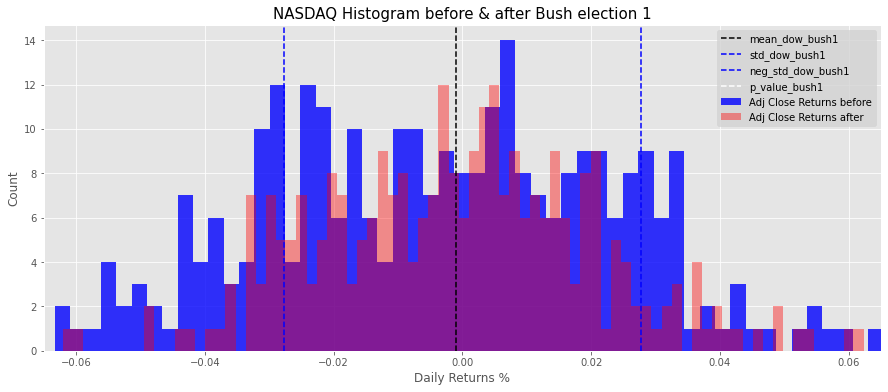

In [134]:
# Plotting of before and after election periods for respective president 
bushbefore1['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns before', color='blue', alpha=0.8)
bushafter1['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns after', color='red', alpha=0.4)

plt.axvline(x=mean_dow_bush1, color='black', linestyle='dashed', label='mean_dow_bush1')
plt.axvline(x=std_dow_bush1, color='blue', linestyle='dashed', label='std_dow_bush1')
plt.axvline(x=-std_dow_bush1, color='blue', linestyle='dashed', label='neg_std_dow_bush1')
plt.axvline(x=p_value_bush1, color='white', linestyle='dashed', label='p_value_bush1')

plt.title("NASDAQ Histogram before & after Bush election 1", size=15)
plt.xlabel("Daily Returns %", size=12)
plt.xlim(-0.065, 0.065)
plt.ylabel("Count", size=12)

plt.legend(fontsize=14, loc='upper right')
legend= plt.legend()
frame = legend.get_frame()
frame.set_facecolor('lightgrey')

# Bush Term 2

In [135]:
# Year leading up to election and two months after inauguration
bushbefore2 = nasdaq_filtered1995.loc[nasdaq_filtered1995['Date']>=bush_campaign2].copy()
bushbefore2 = bushbefore2.loc[bushbefore2['Date']<=bush_inauguration2]
# bushbefore2

In [136]:
# Two months after inauguration with a long year span of data
bushafter2 = nasdaq_filtered1995.loc[nasdaq_filtered1995['Date']>=bush_after_inaug2].copy()
bushafter2 = bushafter2.loc[bushafter2['Date']<=bush_year_after2]
# bushafter2

In [137]:
# Combination of Year leading up to election and year after inauguration
bushwhole2 = nasdaq_filtered1995.loc[nasdaq_filtered1995['Date']>=bush_campaign2].copy()
bushwhole2 = bushwhole2.loc[bushwhole2['Date']<=bush_year_after2]
# bushwhole2

In [138]:
# welchs t-test
t_test_bush2=welch_test_statistic(bushbefore2['Volume'], bushafter2['Volume'])
print("Welch's t-Test: {:2.5f}".format(t_test_bush2))

Welch's t-Test: 0.82098


In [139]:
# welch_satterhwaithe_df
df_bush2 = welch_satterhwaithe_df(bushbefore2['Volume'], bushafter2['Volume'])
print("Degrees of Freedom for Welch's Test: {:2.3f}".format(df_bush2))

Degrees of Freedom for Welch's Test: 597.327


In [140]:
# 'students' and p-value for respective analysis
students_bush2 = stats.t(df_bush2) 
p_value_bush2 = students_bush2.cdf(t_test_bush2) + (1 - students_bush2.cdf(-t_test_bush2))

aa=''
if p_value_clinton < 0.01:
    aa = 'P-value failed to Reject our Null Hypotheses'
else:
    aa = 'P-value rejects our Null Hypotheses'
        
p_value_d(aa)
print("p-value: {}, {}".format(p_value_bush2, aa))

p-value: 1.5880154503738861, P-value failed to Reject our Null Hypotheses


In [141]:
# Mean, STD, Variance
mean_dow_bush2 = np.mean(bushwhole2['Adj Close Daily Returns'])
std_dow_bush2 = np.std(bushwhole2['Adj Close Daily Returns'])

# var_dow_clinton = statistics.variance(clintonwhole1['Adj Close Daily Returns'])
var_dow_bush2 = bushwhole2['Adj Close Daily Returns'].var()
print('NASDAQ for ''Adj Close Daily Returns''')
print(f"Mean: {mean_dow_bush2}, \nSTD: {std_dow_bush2}, \nVarience: {var_dow_bush2}")

NASDAQ for Adj Close Daily Returns
Mean: 0.00019330318938555488, 
STD: 0.009151097850764966, 
Varience: 8.388239586738748e-05


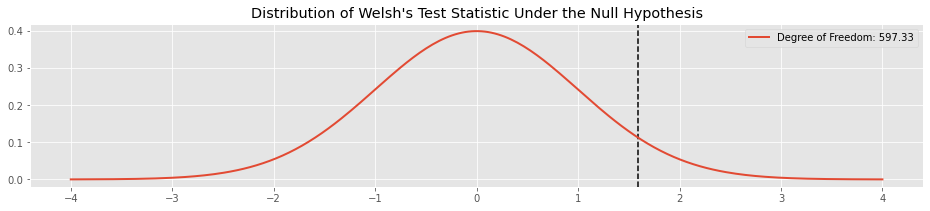

In [142]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis for respective analysis
x = np.linspace(-4, 4, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
plt.axvline(x=p_value_bush2, color='black', linestyle='dashed')
ax.plot(x, students_bush2.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df_bush2))
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x >= -t_test_clinton), color="black", alpha=0.99)
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x <= t_test_clinton), color="black", alpha=0.99)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

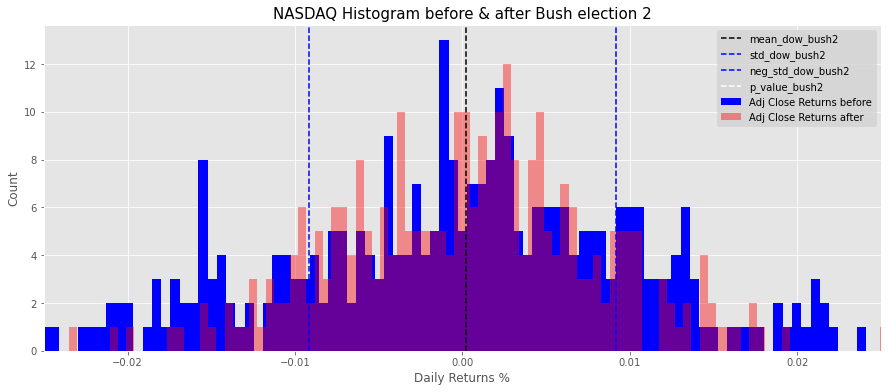

In [143]:
# Plotting of before and after election periods for respective president 
bushbefore2['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns before', color='blue', alpha=1)
bushafter2['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns after', color='red', alpha=0.4)

plt.axvline(x=mean_dow_bush2, color='black', linestyle='dashed', label='mean_dow_bush2')
plt.axvline(x=std_dow_bush2, color='blue', linestyle='dashed', label='std_dow_bush2')
plt.axvline(x=-std_dow_bush2, color='blue', linestyle='dashed', label='neg_std_dow_bush2')
plt.axvline(x=p_value_bush2, color='white', linestyle='dashed', label='p_value_bush2')

plt.title("NASDAQ Histogram before & after Bush election 2", size=15)
plt.xlabel("Daily Returns %", size=12)
plt.xlim(-0.025, 0.025)
plt.ylabel("Count", size=12)

plt.legend(fontsize=14, loc='upper right')
legend= plt.legend()
frame = legend.get_frame()
frame.set_facecolor('lightgrey')

# Obama Term 1

In [144]:
# Year leading up to election and two months after inauguration
obamabefore1 = nasdaq_filtered1995.loc[nasdaq_filtered1995['Date']>=obama_campaign1].copy()
obamabefore1 = obamabefore1.loc[obamabefore1['Date']<=obama_inauguration1]
# obamabefore1

In [145]:
# Two months after inauguration with a long year span of data
obamaafter1 = nasdaq_filtered1995.loc[nasdaq_filtered1995['Date']>=obama_after_inaug1].copy()
obamaafter1 = obamaafter1.loc[obamaafter1['Date']<=obama_year_after1]
# obamaafter1

In [146]:
# Combination of Year leading up to election and year after inauguration
obamawhole1 = nasdaq_filtered1995.loc[nasdaq_filtered1995['Date']>=obama_campaign1].copy()
obamawhole1 = obamawhole1.loc[obamawhole1['Date']<=obama_year_after1]
# obamawhole1

In [147]:
# welchs t-test
t_test_obama1=welch_test_statistic(obamabefore1['Volume'], obamaafter1['Volume'])
print("Welch's t-Test: {:2.5f}".format(t_test_obama1))

Welch's t-Test: -1.97455


In [148]:
# welch_satterhwaithe_df
df_obama1 = welch_satterhwaithe_df(obamabefore1['Volume'], obamaafter1['Volume'])
print("Degrees of Freedom for Welch's Test: {:2.3f}".format(df_obama1))

Degrees of Freedom for Welch's Test: 599.523


In [149]:
# 'students' and p-value for respective analysis
students_obama1 = stats.t(df_obama1) 
p_value_obama1 = students_obama1.cdf(t_test_obama1) + (1 - students_obama1.cdf(-t_test_obama1))

aa=''
if p_value_obama1 < 0.01:
    aa = 'P-value failed to Reject our Null Hypotheses'
else:
    aa = 'P-value rejects our Null Hypotheses'
        
p_value_d(aa)
print("p-value: {}, {}".format(p_value_obama1, aa))

p-value: 0.04877788722980833, P-value rejects our Null Hypotheses


In [150]:
# Mean, STD, Variance
mean_dow_obama1 = np.mean(obamawhole1['Adj Close Daily Returns'])
std_dow_obama1 = np.std(obamawhole1['Adj Close Daily Returns'])

# var_dow_clinton = statistics.variance(clintonwhole1['Adj Close Daily Returns'])
var_dow_obama1 = obamawhole1['Adj Close Daily Returns'].var()
print('NASDAQ for ''Adj Close Daily Returns''')
print(f"Mean: {mean_dow_obama1}, \nSTD: {std_dow_obama1}, \nVarience: {var_dow_obama1}")

NASDAQ for Adj Close Daily Returns
Mean: -8.699234566411529e-05, 
STD: 0.021023976611376515, 
Varience: 0.000442744271876633


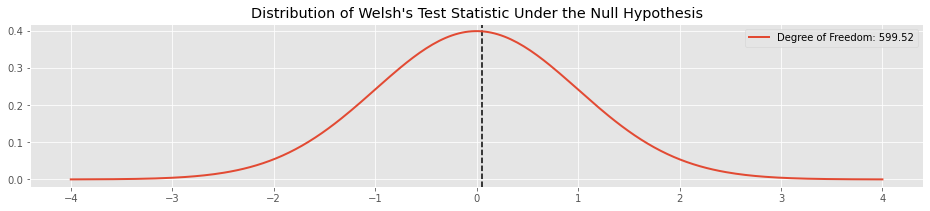

In [151]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis for respective analysis
x = np.linspace(-4, 4, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
plt.axvline(x=p_value_obama1, color='black', linestyle='dashed')
ax.plot(x, students_obama1.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df_obama1))
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x >= -t_test_clinton), color="black", alpha=0.99)
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x <= t_test_clinton), color="black", alpha=0.99)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

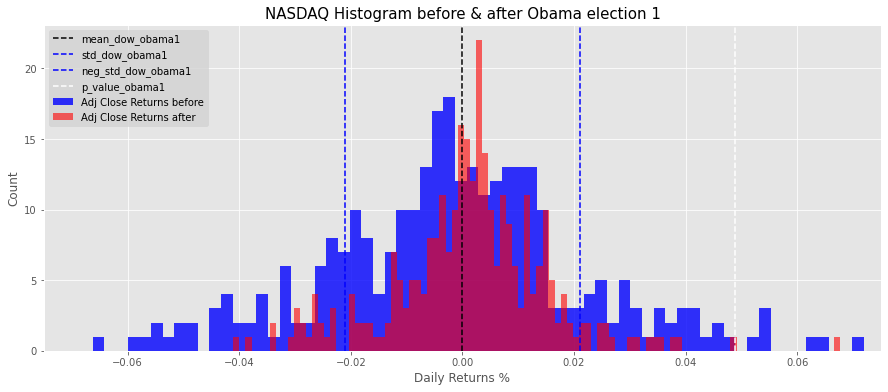

In [152]:
# Plotting of before and after election periods for respective president 
obamabefore1['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns before', color='blue', alpha=0.8)
obamaafter1['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns after', color='red', alpha=0.6)

plt.axvline(x=mean_dow_obama1, color='black', linestyle='dashed', label='mean_dow_obama1')
plt.axvline(x=std_dow_obama1, color='blue', linestyle='dashed', label='std_dow_obama1')
plt.axvline(x=-std_dow_obama1, color='blue', linestyle='dashed', label='neg_std_dow_obama1')
plt.axvline(x=p_value_obama1, color='white', linestyle='dashed', label='p_value_obama1')

plt.title("NASDAQ Histogram before & after Obama election 1", size=15)
plt.xlabel("Daily Returns %", size=12)
plt.xlim(-0.075, 0.075)
plt.ylabel("Count", size=12)

plt.legend(fontsize=14, loc='upper right')
legend= plt.legend()
frame = legend.get_frame()
frame.set_facecolor('lightgrey')

# Obama Term 2

In [153]:
# Year leading up to election and two months after inauguration
obamabefore2 = nasdaq_filtered1995.loc[nasdaq_filtered1995['Date']>=obama_campaign2].copy()
obamabefore2 = obamabefore2.loc[obamabefore2['Date']<=obama_inauguration2]
# obamabefore2

In [154]:
# Two months after inauguration with a long year span of data
obamaafter2 = nasdaq_filtered1995.loc[nasdaq_filtered1995['Date']>=obama_after_inaug2].copy()
obamaafter2 = obamaafter2.loc[obamaafter2['Date']<=obama_year_after2]
# obamaafter2

In [155]:
# Combination of Year leading up to election and year after inauguration
obamawhole2 = nasdaq_filtered1995.loc[nasdaq_filtered1995['Date']>=obama_campaign2].copy()
obamawhole2 = obamawhole2.loc[obamawhole2['Date']<=obama_year_after2]
# obamawhole2

In [156]:
# welchs t-test
t_test_obama2=welch_test_statistic(obamabefore2['Volume'], obamaafter2['Volume'])
print("Welch's t-Test: {:2.5f}".format(t_test_obama2))

Welch's t-Test: 1.93992


In [157]:
# welch_satterhwaithe_df
df_obama2 = welch_satterhwaithe_df(obamabefore2['Volume'], obamaafter2['Volume'])
print("Degrees of Freedom for Welch's Test: {:2.3f}".format(df_obama2))

Degrees of Freedom for Welch's Test: 85.710


In [158]:
# 'students' and p-value for respective analysis
students_obama2 = stats.t(df_obama2) 
p_value_obama2 = students_obama2.cdf(t_test_obama2) + (1 - students_obama2.cdf(-t_test_obama2))

aa=''
if p_value_obama2 < 0.01:
    aa = 'P-value failed to Reject our Null Hypotheses'
else:
    aa = 'P-value rejects our Null Hypotheses'
        
p_value_d(aa)
print("p-value: {}, {}".format(p_value_obama2, aa))

p-value: 1.9443216759780713, P-value rejects our Null Hypotheses


In [159]:
# Mean, STD, Variance
mean_dow_obama2 = np.mean(obamawhole2['Adj Close Daily Returns'])
std_dow_obama2 = np.std(obamawhole2['Adj Close Daily Returns'])

# var_dow_clinton = statistics.variance(clintonwhole1['Adj Close Daily Returns'])
var_dow_obama2 = obamawhole2['Adj Close Daily Returns'].var()
print('NASDAQ for ''Adj Close Daily Returns''')
print(f"Mean: {mean_dow_obama2}, \nSTD: {std_dow_obama2}, \nVarience: {var_dow_obama2}")

NASDAQ for Adj Close Daily Returns
Mean: 0.0008917332868992981, 
STD: 0.009051373248473207, 
Varience: 8.216482828515663e-05


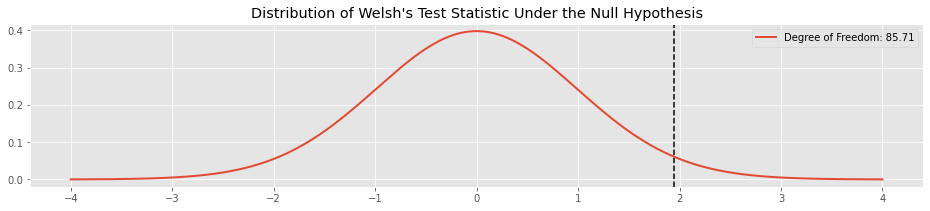

In [160]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis for respective analysis
x = np.linspace(-4, 4, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
plt.axvline(x=p_value_obama2, color='black', linestyle='dashed')
ax.plot(x, students_obama2.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df_obama2))
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x >= -t_test_clinton), color="black", alpha=0.99)
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x <= t_test_clinton), color="black", alpha=0.99)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

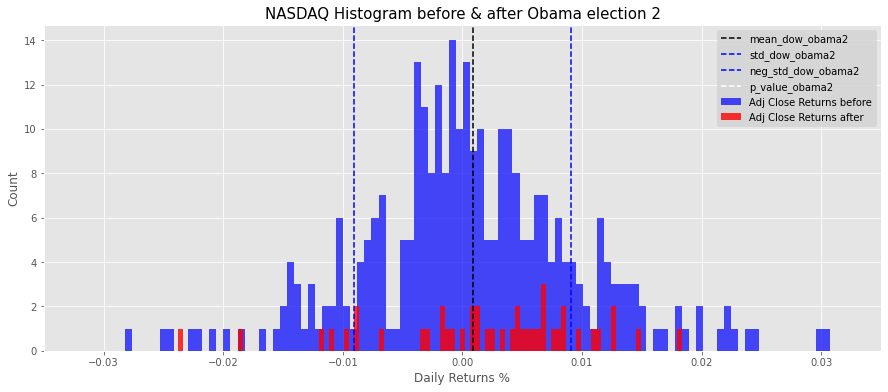

In [161]:
# Plotting of before and after election periods for respective president 
obamabefore2['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns before', color='blue', alpha=0.7)
obamaafter2['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns after', color='red', alpha=0.8)

plt.axvline(x=mean_dow_obama2, color='black', linestyle='dashed', label='mean_dow_obama2')
plt.axvline(x=std_dow_obama2, color='blue', linestyle='dashed', label='std_dow_obama2')
plt.axvline(x=-std_dow_obama2, color='blue', linestyle='dashed', label='neg_std_dow_obama2')
plt.axvline(x=p_value_obama2, color='white', linestyle='dashed', label='p_value_obama2')

plt.title("NASDAQ Histogram before & after Obama election 2", size=15)
plt.xlabel("Daily Returns %", size=12)
plt.xlim(-0.035, 0.035)
plt.ylabel("Count", size=12)

plt.legend(fontsize=14, loc='upper right')
legend= plt.legend()
frame = legend.get_frame()
frame.set_facecolor('lightgrey')

# Trump Term 1

In [162]:
# Year leading up to election and two months after inauguration
trumpbefore1 = nasdaq_filtered1995.loc[nasdaq_filtered1995['Date']>=trump_campaign1].copy()
trumpbefore1 = trumpbefore1.loc[trumpbefore1['Date']<=trump_inauguration1]
# trumpbefore1

In [163]:
# Two months after inauguration with a long year span of data
trumpafter1 = nasdaq_filtered1995.loc[nasdaq_filtered1995['Date']>=trump_after_inaug1].copy()
trumpafter1 = trumpafter1.loc[trumpafter1['Date']<=trump_year_after1]
# trumpafter1

In [164]:
# Combination of Year leading up to election and year after inauguration
trumpwhole1 = nasdaq_filtered1995.loc[nasdaq_filtered1995['Date']>=trump_campaign1].copy()
trumpwhole1 = trumpwhole1.loc[trumpwhole1['Date']<=trump_year_after1]
# trumpwhole1

In [165]:
# welchs t-test
t_test_trump1=welch_test_statistic(trumpbefore1['Volume'], trumpafter1['Volume'])
print("Welch's t-Test: {:2.5f}".format(t_test_trump1))

Welch's t-Test: -3.45022


In [166]:
# welch_satterhwaithe_df
df_trump1 = welch_satterhwaithe_df(trumpbefore1['Volume'], trumpafter1['Volume'])
print("Degrees of Freedom for Welch's Test: {:2.3f}".format(df_trump1))

Degrees of Freedom for Welch's Test: 596.125


In [167]:
# 'students' and p-value for respective analysis
students_trump1 = stats.t(df_trump1) 
p_value_trump1 = students_trump1.cdf(t_test_trump1) + (1 - students_trump1.cdf(-t_test_trump1))

aa=''
if p_value_trump1 < 0.01:
    aa = 'P-value failed to Reject our Null Hypotheses'
else:
    aa = 'P-value rejects our Null Hypotheses'
        
p_value_d(aa)
print("p-value: {}, {}".format(p_value_trump1, aa))

p-value: 0.0005997252918004108, P-value failed to Reject our Null Hypotheses


In [168]:
# Mean, STD, Variance
mean_dow_trump1 = np.mean(trumpwhole1['Adj Close Daily Returns'])
std_dow_trump1 = np.std(trumpwhole1['Adj Close Daily Returns'])

# var_dow_clinton = statistics.variance(clintonwhole1['Adj Close Daily Returns'])
var_dow_trump1 = clintonwhole1['Adj Close Daily Returns'].var()
print('NASDAQ for ''Adj Close Daily Returns''')
print(f"Mean: {mean_dow_trump1}, \nSTD: {std_dow_trump1}, \nVarience: {var_dow_trump1}")

NASDAQ for Adj Close Daily Returns
Mean: 0.0006837031690333986, 
STD: 0.009126486705576062, 
Varience: 0.00011339893767818784


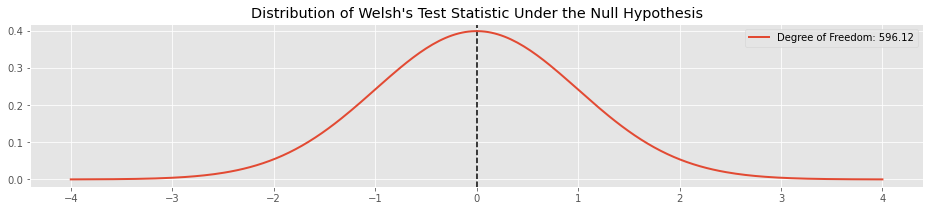

In [169]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis for respective analysis
x = np.linspace(-4, 4, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
plt.axvline(x=p_value_trump1, color='black', linestyle='dashed')
ax.plot(x, students_trump1.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df_trump1))
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x >= -t_test_clinton), color="black", alpha=0.99)
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x <= t_test_clinton), color="black", alpha=0.99)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

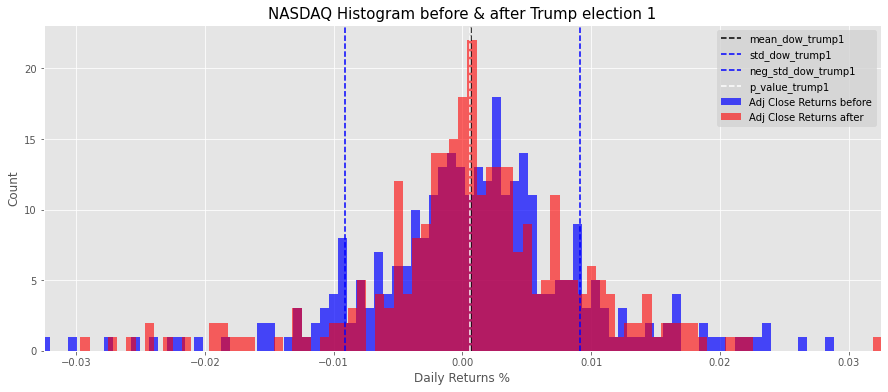

In [170]:
# Plotting of before and after election periods for respective president 
trumpbefore1['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns before', color='blue', alpha=0.7)
trumpafter1['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns after', color='red', alpha=0.6)

plt.axvline(x=mean_dow_trump1, color='black', linestyle='dashed', label='mean_dow_trump1')
plt.axvline(x=std_dow_trump1, color='blue', linestyle='dashed', label='std_dow_trump1')
plt.axvline(x=-std_dow_trump1, color='blue', linestyle='dashed', label='neg_std_dow_trump1')
plt.axvline(x=p_value_trump1, color='white', linestyle='dashed', label='p_value_trump1')

plt.title("NASDAQ Histogram before & after Trump election 1", size=15)
plt.xlabel("Daily Returns %", size=12)
plt.xlim(-0.0325, 0.0325)
plt.ylabel("Count", size=12)

plt.legend(fontsize=14, loc='upper right')
legend= plt.legend()
frame = legend.get_frame()
frame.set_facecolor('lightgrey')

#  President time frames before & after election for  S&P500

# Clinton

In [171]:
# Year leading up to election and two months after inauguration
clintonbefore1 = SP500_filtered1995.loc[SP500_filtered1995['Date']>=clinton_campaign].copy()
clintonbefore1 = clintonbefore1.loc[clintonbefore1['Date']<=clinton_inauguration]
# clintonbefore1

In [172]:
# Two months after inauguration with a long year span of data
clintonafter1 = SP500_filtered1995.loc[SP500_filtered1995['Date']>=clinton_after_inaug].copy()
clintonafter1 = clintonafter1.loc[clintonafter1['Date']<=clinton_year_after]
# clintonafter1

In [173]:
# Combination of Year leading up to election and year after inauguration
clintonwhole1 = SP500_filtered1995.loc[SP500_filtered1995['Date']>=clinton_campaign].copy()
clintonwhole1 = clintonwhole1.loc[clintonwhole1['Date']<=clinton_year_after]
# clintonwhole1

In [174]:
# welchs t-test
t_test_clinton=welch_test_statistic(clintonbefore1['Volume'], clintonafter1['Volume'])
print("Welch's t-Test: {:2.5f}".format(t_test_clinton))

Welch's t-Test: -17.96293


In [175]:
# welch_satterhwaithe_df
df_clinton = welch_satterhwaithe_df(clintonbefore1['Volume'], clintonafter1['Volume'])
print("Degrees of Freedom for Welch's Test: {:2.3f}".format(df_clinton))

Degrees of Freedom for Welch's Test: 573.474


In [176]:
# 'students' and p-value for respective analysis
students_clinton = stats.t(df_clinton) 
p_value_clinton = students_clinton.cdf(t_test_clinton) + (1 - students_clinton.cdf(-t_test_clinton))

aa=''
if p_value_clinton < 0.01:
    aa = 'P-value failed to Reject our Null Hypotheses'
else:
    aa = 'P-value rejects our Null Hypotheses'
        
p_value_d(aa)
print("p-value: {}, {}".format(p_value_clinton, aa))

p-value: 7.151287128882332e-58, P-value failed to Reject our Null Hypotheses


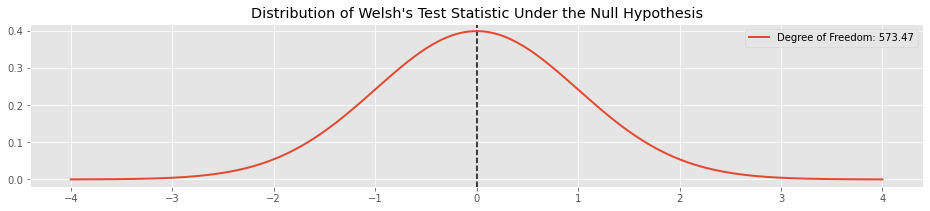

In [177]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis for respective analysis
x = np.linspace(-4, 4, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
plt.axvline(x=p_value_clinton, color='black', linestyle='dashed')
ax.plot(x, students_clinton.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df_clinton))
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x >= -t_test_clinton), color="black", alpha=0.99)
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x <= t_test_clinton), color="black", alpha=0.99)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

In [178]:
# Mean, STD, Variance
mean_dow_clinton = np.mean(clintonwhole1['Adj Close Daily Returns'])
std_dow_clinton = np.std(clintonwhole1['Adj Close Daily Returns'])

# var_dow_clinton = statistics.variance(clintonwhole1['Adj Close Daily Returns'])
var_dow_clinton = clintonwhole1['Adj Close Daily Returns'].var()
print('S&P500 for ''Adj Close Daily Returns''')
print(f"Mean: {mean_dow_clinton}, \nSTD: {std_dow_clinton}, \nVarience: {var_dow_clinton}")

S&P500 for Adj Close Daily Returns
Mean: 0.0010352498142003085, 
STD: 0.009423465855980553, 
Varience: 8.894921988291573e-05


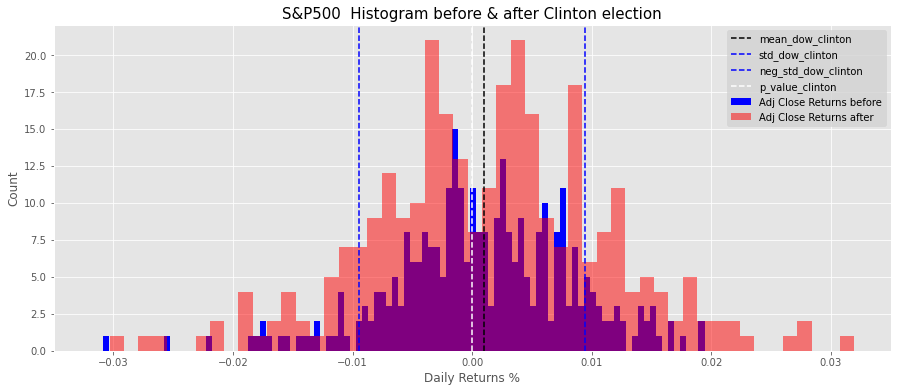

In [179]:
# Plotting of before and after election periods for respective president 
clintonbefore1['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns before', color='blue', alpha=1)
clintonafter1['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns after', color='red', alpha=0.5)

plt.axvline(x=mean_dow_clinton, color='black', linestyle='dashed', label='mean_dow_clinton')
plt.axvline(x=std_dow_clinton, color='blue', linestyle='dashed', label='std_dow_clinton')
plt.axvline(x=-std_dow_clinton, color='blue', linestyle='dashed', label='neg_std_dow_clinton')
plt.axvline(x=p_value_clinton, color='white', linestyle='dashed', label='p_value_clinton')

plt.title("S&P500  Histogram before & after Clinton election", size=15)
plt.xlabel("Daily Returns %", size=12)
plt.xlim(-0.035, 0.035)
plt.ylabel("Count", size=12)

plt.legend(fontsize=14, loc='upper right')
legend= plt.legend()
frame = legend.get_frame()
frame.set_facecolor('lightgrey')

# Bush Term 1

In [180]:
# Year leading up to election and two months after inauguration
bushbefore1 = SP500_filtered1995.loc[SP500_filtered1995['Date']>=bush_campaign1].copy()
bushbefore1 = bushbefore1.loc[bushbefore1['Date']<=bush_inauguration1]
# bushbefore1

In [181]:
# Two months after inauguration with a long year span of data
bushafter1 = SP500_filtered1995.loc[SP500_filtered1995['Date']>=bush_after_inaug1].copy()
bushafter1 = bushafter1.loc[bushafter1['Date']<=bush_year_after1]
# bushafter1

In [182]:
# Combination of Year leading up to election and year after inauguration
bushwhole1 = SP500_filtered1995.loc[SP500_filtered1995['Date']>=bush_campaign1].copy()
bushwhole1 = bushwhole1.loc[bushwhole1['Date']<=bush_year_after1]
# bushwhole1

In [183]:
# welchs t-test
t_test_bush1=welch_test_statistic(bushbefore1['Volume'], bushafter1['Volume'])
print("Welch's t-Test: {:2.5f}".format(t_test_bush1))

Welch's t-Test: -10.91172


In [184]:
# welch_satterhwaithe_df
df_bush1 = welch_satterhwaithe_df(bushbefore1['Volume'], bushafter1['Volume'])
print("Degrees of Freedom for Welch's Test: {:2.3f}".format(df_bush1))

Degrees of Freedom for Welch's Test: 544.388


In [185]:
# 'students' and p-value for respective analysis
students_bush1 = stats.t(df_bush1) 
p_value_bush1 = students_bush1.cdf(t_test_bush1) + (1 - students_bush1.cdf(-t_test_bush1))

aa=''
if p_value_bush1 < 0.01:
    aa = 'P-value failed to Reject our Null Hypotheses'
else:
    aa = 'P-value rejects our Null Hypotheses'
        
p_value_d(aa)
print("p-value: {}, {}".format(p_value_bush1, aa))

p-value: 1.6603142368420075e-25, P-value failed to Reject our Null Hypotheses


In [186]:
# Mean, STD, Variance
mean_dow_bush1 = np.mean(bushwhole1['Adj Close Daily Returns'])
std_dow_bush1 = np.std(bushwhole1['Adj Close Daily Returns'])

# var_dow_clinton = statistics.variance(clintonwhole1['Adj Close Daily Returns'])
var_dow_bush1 = bushwhole1['Adj Close Daily Returns'].var()
print('S&P500  for ''Adj Close Daily Returns''')
print(f"Mean: {mean_dow_bush1}, \nSTD: {std_dow_bush1}, \nVarience: {var_dow_bush1}")

S&P500  for Adj Close Daily Returns
Mean: -0.0004078827783828183, 
STD: 0.013422400414208953, 
Varience: 0.00018046362419512032


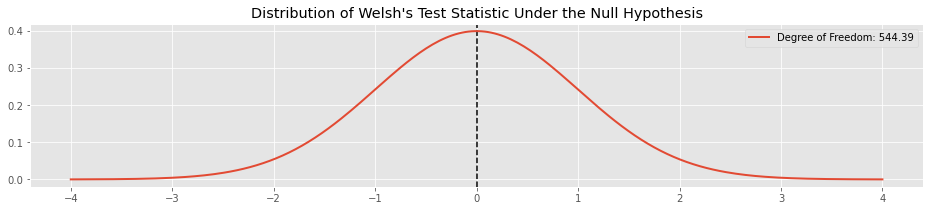

In [187]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis for respective analysis
x = np.linspace(-4, 4, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
plt.axvline(x=p_value_bush1, color='black', linestyle='dashed')
ax.plot(x, students_bush1.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df_bush1))
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x >= -t_test_clinton), color="black", alpha=0.99)
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x <= t_test_clinton), color="black", alpha=0.99)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

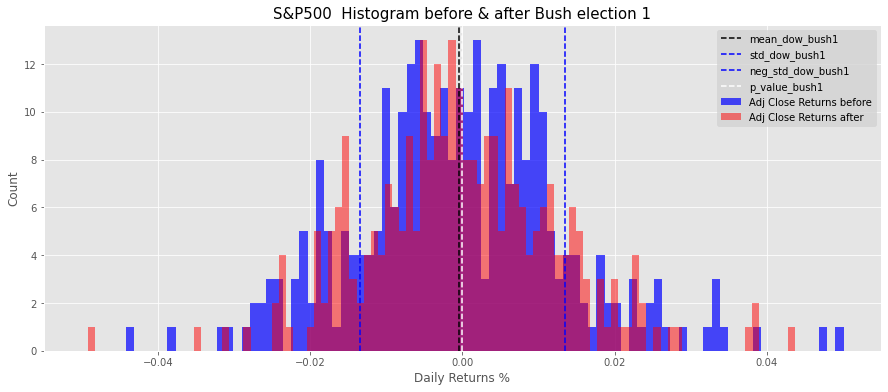

In [188]:
# Plotting of before and after election periods for respective president 
bushbefore1['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns before', color='blue', alpha=0.7)
bushafter1['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns after', color='red', alpha=0.5)

plt.axvline(x=mean_dow_bush1, color='black', linestyle='dashed', label='mean_dow_bush1')
plt.axvline(x=std_dow_bush1, color='blue', linestyle='dashed', label='std_dow_bush1')
plt.axvline(x=-std_dow_bush1, color='blue', linestyle='dashed', label='neg_std_dow_bush1')
plt.axvline(x=p_value_bush1, color='white', linestyle='dashed', label='p_value_bush1')

plt.title("S&P500  Histogram before & after Bush election 1", size=15)
plt.xlabel("Daily Returns %", size=12)
plt.xlim(-0.055, 0.055)
plt.ylabel("Count", size=12)

plt.legend(fontsize=14, loc='upper right')
legend= plt.legend()
frame = legend.get_frame()
frame.set_facecolor('lightgrey')

# Bush Term 2

In [189]:
# Year leading up to election and two months after inauguration
bushbefore2 = SP500_filtered1995.loc[SP500_filtered1995['Date']>=bush_campaign2].copy()
bushbefore2 = bushbefore2.loc[bushbefore2['Date']<=bush_inauguration2]
# bushbefore2

In [190]:
# Two months after inauguration with a long year span of data
bushafter2 = SP500_filtered1995.loc[SP500_filtered1995['Date']>=bush_after_inaug2].copy()
bushafter2 = bushafter2.loc[bushafter2['Date']<=bush_year_after2]
# bushafter2

In [191]:
# Combination of Year leading up to election and year after inauguration
bushwhole2 = SP500_filtered1995.loc[SP500_filtered1995['Date']>=bush_campaign2].copy()
bushwhole2 = bushwhole2.loc[bushwhole2['Date']<=bush_year_after2]
# bushwhole2

In [192]:
# welchs t-test
t_test_bush2=welch_test_statistic(bushbefore2['Volume'], bushafter2['Volume'])
print("Welch's t-Test: {:2.5f}".format(t_test_bush2))

Welch's t-Test: -28.88946


In [193]:
# welch_satterhwaithe_df
df_bush2 = welch_satterhwaithe_df(bushbefore2['Volume'], bushafter2['Volume'])
print("Degrees of Freedom for Welch's Test: {:2.3f}".format(df_bush2))

Degrees of Freedom for Welch's Test: 520.301


In [194]:
# 'students' and p-value for respective analysis
students_bush2 = stats.t(df_bush2) 
p_value_bush2 = students_bush2.cdf(t_test_bush2) + (1 - students_bush2.cdf(-t_test_bush2))

aa=''
if p_value_clinton < 0.01:
    aa = 'P-value failed to Reject our Null Hypotheses'
else:
    aa = 'P-value rejects our Null Hypotheses'
        
p_value_d(aa)
print("p-value: {}, {}".format(p_value_bush2, aa))

p-value: 1.6400326184545887e-110, P-value failed to Reject our Null Hypotheses


In [195]:
# Mean, STD, Variance
mean_dow_bush2 = np.mean(bushwhole2['Adj Close Daily Returns'])
std_dow_bush2 = np.std(bushwhole2['Adj Close Daily Returns'])

# var_dow_clinton = statistics.variance(clintonwhole1['Adj Close Daily Returns'])
var_dow_bush2 = bushwhole2['Adj Close Daily Returns'].var()
print('S&P500 for ''Adj Close Daily Returns''')
print(f"Mean: {mean_dow_bush2}, \nSTD: {std_dow_bush2}, \nVarience: {var_dow_bush2}")

S&P500 for Adj Close Daily Returns
Mean: 0.00023966187124467315, 
STD: 0.006631848090054706, 
Varience: 4.4054833812583224e-05


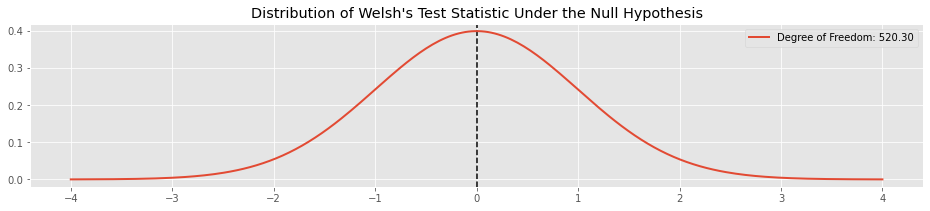

In [196]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis for respective analysis
x = np.linspace(-4, 4, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
plt.axvline(x=p_value_bush2, color='black', linestyle='dashed')
ax.plot(x, students_bush2.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df_bush2))
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x >= -t_test_clinton), color="black", alpha=0.99)
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x <= t_test_clinton), color="black", alpha=0.99)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

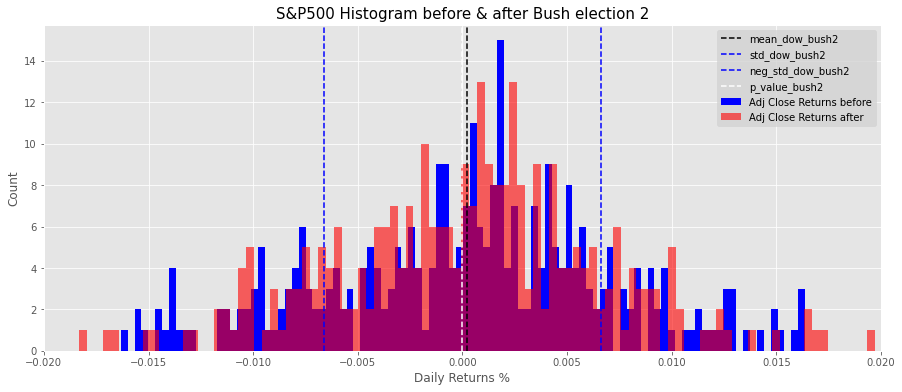

In [226]:
# Plotting of before and after election periods for respective president 
bushbefore2['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns before', color='blue', alpha=1)
bushafter2['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns after', color='red', alpha=0.6)

plt.axvline(x=mean_dow_bush2, color='black', linestyle='dashed', label='mean_dow_bush2')
plt.axvline(x=std_dow_bush2, color='blue', linestyle='dashed', label='std_dow_bush2')
plt.axvline(x=-std_dow_bush2, color='blue', linestyle='dashed', label='neg_std_dow_bush2')
plt.axvline(x=p_value_bush2, color='white', linestyle='dashed', label='p_value_bush2')

plt.title("S&P500 Histogram before & after Bush election 2", size=15)
plt.xlabel("Daily Returns %", size=12)
plt.xlim(-0.02, 0.02)
plt.ylabel("Count", size=12)

plt.legend(fontsize=14, loc='upper right')
legend= plt.legend()
frame = legend.get_frame()
frame.set_facecolor('lightgrey')

# Obama Term 1

In [198]:
# Year leading up to election and two months after inauguration
obamabefore1 = SP500_filtered1995.loc[SP500_filtered1995['Date']>=obama_campaign1].copy()
obamabefore1 = obamabefore1.loc[obamabefore1['Date']<=obama_inauguration1]
# obamabefore1

In [199]:
# Two months after inauguration with a long year span of data
obamaafter1 = SP500_filtered1995.loc[SP500_filtered1995['Date']>=obama_after_inaug1].copy()
obamaafter1 = obamaafter1.loc[obamaafter1['Date']<=obama_year_after1]
# obamaafter1

In [200]:
# Combination of Year leading up to election and year after inauguration
obamawhole1 = SP500_filtered1995.loc[SP500_filtered1995['Date']>=obama_campaign1].copy()
obamawhole1 = obamawhole1.loc[obamawhole1['Date']<=obama_year_after1]
# obamawhole1

In [201]:
# welchs t-test
t_test_obama1=welch_test_statistic(obamabefore1['Volume'], obamaafter1['Volume'])
print("Welch's t-Test: {:2.5f}".format(t_test_obama1))

Welch's t-Test: 0.31687


In [202]:
# welch_satterhwaithe_df
df_obama1 = welch_satterhwaithe_df(obamabefore1['Volume'], obamaafter1['Volume'])
print("Degrees of Freedom for Welch's Test: {:2.3f}".format(df_obama1))

Degrees of Freedom for Welch's Test: 583.979


In [203]:
# 'students' and p-value for respective analysis
students_obama1 = stats.t(df_obama1) 
p_value_obama1 = students_obama1.cdf(t_test_obama1) + (1 - students_obama1.cdf(-t_test_obama1))

aa=''
if p_value_obama1 < 0.01:
    aa = 'P-value failed to Reject our Null Hypotheses'
else:
    aa = 'P-value rejects our Null Hypotheses'
        
p_value_d(aa)
print("p-value: {}, {}".format(p_value_obama1, aa))

p-value: 1.2485458292413303, P-value rejects our Null Hypotheses


In [204]:
# Mean, STD, Variance
mean_dow_obama1 = np.mean(obamawhole1['Adj Close Daily Returns'])
std_dow_obama1 = np.std(obamawhole1['Adj Close Daily Returns'])

# var_dow_clinton = statistics.variance(clintonwhole1['Adj Close Daily Returns'])
var_dow_obama1 = obamawhole1['Adj Close Daily Returns'].var()
print('S&P500 for ''Adj Close Daily Returns''')
print(f"Mean: {mean_dow_obama1}, \nSTD: {std_dow_obama1}, \nVarience: {var_dow_obama1}")

S&P500 for Adj Close Daily Returns
Mean: -0.0003107759759292176, 
STD: 0.020642568655618674, 
Varience: 0.0004268258334364338


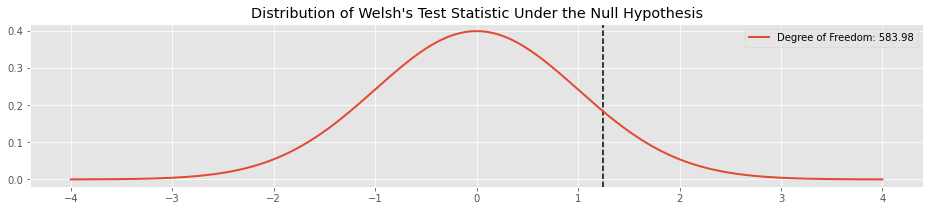

In [205]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis for respective analysis
x = np.linspace(-4, 4, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
plt.axvline(x=p_value_obama1, color='black', linestyle='dashed')
ax.plot(x, students_obama1.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df_obama1))
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x >= -t_test_clinton), color="black", alpha=0.99)
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x <= t_test_clinton), color="black", alpha=0.99)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

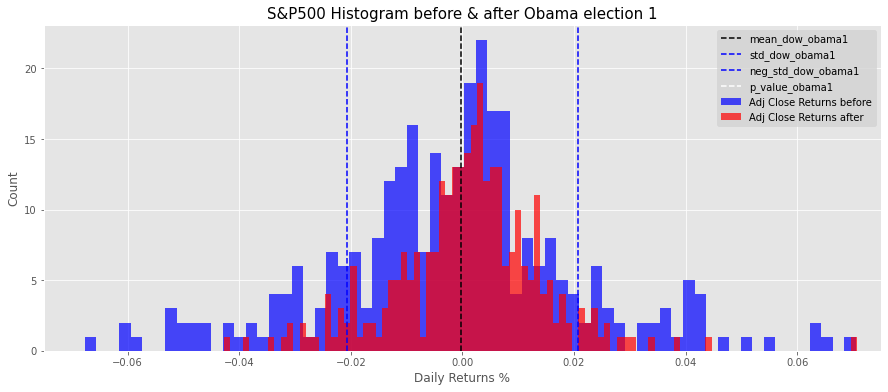

In [206]:
# Plotting of before and after election periods for respective president 
obamabefore1['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns before', color='blue', alpha=0.7)
obamaafter1['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns after', color='red', alpha=0.7)

plt.axvline(x=mean_dow_obama1, color='black', linestyle='dashed', label='mean_dow_obama1')
plt.axvline(x=std_dow_obama1, color='blue', linestyle='dashed', label='std_dow_obama1')
plt.axvline(x=-std_dow_obama1, color='blue', linestyle='dashed', label='neg_std_dow_obama1')
plt.axvline(x=p_value_obama1, color='white', linestyle='dashed', label='p_value_obama1')

plt.title("S&P500 Histogram before & after Obama election 1", size=15)
plt.xlabel("Daily Returns %", size=12)
plt.xlim(-0.075, 0.075)
plt.ylabel("Count", size=12)

plt.legend(fontsize=14, loc='upper right')
legend= plt.legend()
frame = legend.get_frame()
frame.set_facecolor('lightgrey')

# Obama Term 2

In [207]:
# Year leading up to election and two months after inauguration
obamabefore2 = SP500_filtered1995.loc[SP500_filtered1995['Date']>=obama_campaign2].copy()
obamabefore2 = obamabefore2.loc[obamabefore2['Date']<=obama_inauguration2]
# obamabefore2

In [208]:
# Two months after inauguration with a long year span of data
obamaafter2 = SP500_filtered1995.loc[SP500_filtered1995['Date']>=obama_after_inaug2].copy()
obamaafter2 = obamaafter2.loc[obamaafter2['Date']<=obama_year_after2]
# obamaafter2

In [209]:
# Combination of Year leading up to election and year after inauguration
obamawhole2 = SP500_filtered1995.loc[SP500_filtered1995['Date']>=obama_campaign2].copy()
obamawhole2 = obamawhole2.loc[obamawhole2['Date']<=obama_year_after2]
# obamawhole2

In [210]:
# welchs t-test
t_test_obama2=welch_test_statistic(obamabefore2['Volume'], obamaafter2['Volume'])
print("Welch's t-Test: {:2.5f}".format(t_test_obama2))

Welch's t-Test: 3.49544


In [211]:
# welch_satterhwaithe_df
df_obama2 = welch_satterhwaithe_df(obamabefore2['Volume'], obamaafter2['Volume'])
print("Degrees of Freedom for Welch's Test: {:2.3f}".format(df_obama2))

Degrees of Freedom for Welch's Test: 69.017


In [212]:
# 'students' and p-value for respective analysis
students_obama2 = stats.t(df_obama2) 
p_value_obama2 = students_obama2.cdf(t_test_obama2) + (1 - students_obama2.cdf(-t_test_obama2))

aa=''
if p_value_obama2 < 0.01:
    aa = 'P-value failed to Reject our Null Hypotheses'
else:
    aa = 'P-value rejects our Null Hypotheses'
    
p_value_d(aa)
print("p-value: {}, {}".format(p_value_obama2, aa))

p-value: 1.999168371362877, P-value rejects our Null Hypotheses


In [213]:
# Mean, STD, Variance
mean_dow_obama2 = np.mean(obamawhole2['Adj Close Daily Returns'])
std_dow_obama2 = np.std(obamawhole2['Adj Close Daily Returns'])

# var_dow_clinton = statistics.variance(clintonwhole1['Adj Close Daily Returns'])
var_dow_obama2 = obamawhole2['Adj Close Daily Returns'].var()
print('S&P500 for ''Adj Close Daily Returns''')
print(f"Mean: {mean_dow_obama2}, \nSTD: {std_dow_obama2}, \nVarience: {var_dow_obama2}")

S&P500 for Adj Close Daily Returns
Mean: 0.0008437625348220023, 
STD: 0.0077674946523986115, 
Varience: 6.0508854256707816e-05


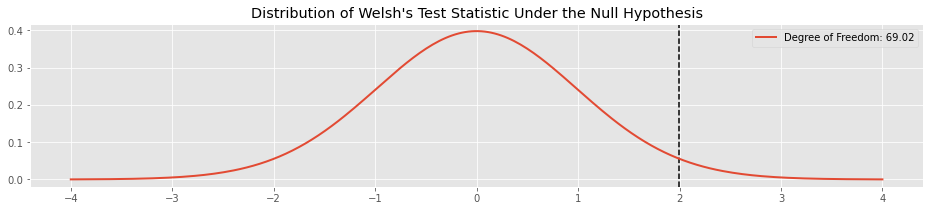

In [214]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis for respective analysis
x = np.linspace(-4, 4, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
plt.axvline(x=p_value_obama2, color='black', linestyle='dashed')
ax.plot(x, students_obama2.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df_obama2))
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x >= -t_test_clinton), color="black", alpha=0.99)
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x <= t_test_clinton), color="black", alpha=0.99)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

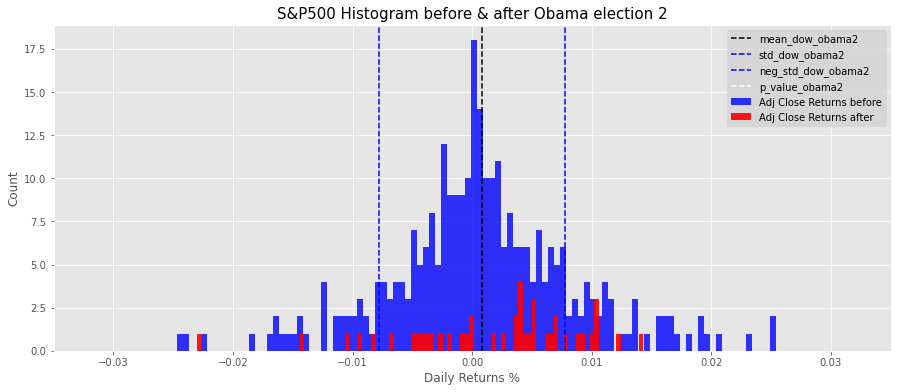

In [215]:
# Plotting of before and after election periods for respective president 
obamabefore2['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns before', color='blue', alpha=0.8)
obamaafter2['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns after', color='red', alpha=0.9)

plt.axvline(x=mean_dow_obama2, color='black', linestyle='dashed', label='mean_dow_obama2')
plt.axvline(x=std_dow_obama2, color='blue', linestyle='dashed', label='std_dow_obama2')
plt.axvline(x=-std_dow_obama2, color='blue', linestyle='dashed', label='neg_std_dow_obama2')
plt.axvline(x=p_value_obama2, color='white', linestyle='dashed', label='p_value_obama2')

plt.title("S&P500 Histogram before & after Obama election 2", size=15)
plt.xlabel("Daily Returns %", size=12)
plt.xlim(-0.035, 0.035)
plt.ylabel("Count", size=12)

plt.legend(fontsize=14, loc='upper right')
legend= plt.legend()
frame = legend.get_frame()
frame.set_facecolor('lightgrey')

# Trump Term 1

In [216]:
# Year leading up to election and two months after inauguration
trumpbefore1 = SP500_filtered1995.loc[SP500_filtered1995['Date']>=trump_campaign1].copy()
trumpbefore1 = trumpbefore1.loc[trumpbefore1['Date']<=trump_inauguration1]
# trumpbefore1

In [217]:
# Two months after inauguration with a long year span of data
trumpafter1 = SP500_filtered1995.loc[SP500_filtered1995['Date']>=trump_after_inaug1].copy()
trumpafter1 = trumpafter1.loc[trumpafter1['Date']<=trump_year_after1]
# clintonafter1

In [218]:
# Combination of Year leading up to election and year after inauguration
trumpwhole1 = SP500_filtered1995.loc[SP500_filtered1995['Date']>=trump_campaign1].copy()
trumpwhole1 = trumpwhole1.loc[trumpwhole1['Date']<=trump_year_after1]
# clintonwhole1

In [219]:
# welchs t-test
t_test_trump1=welch_test_statistic(trumpbefore1['Volume'], trumpafter1['Volume'])
print("Welch's t-Test: {:2.5f}".format(t_test_trump1))

Welch's t-Test: 7.34749


In [220]:
# welch_satterhwaithe_df
df_trump1 = welch_satterhwaithe_df(trumpbefore1['Volume'], trumpafter1['Volume'])
print("Degrees of Freedom for Welch's Test: {:2.3f}".format(df_trump1))

Degrees of Freedom for Welch's Test: 560.858


In [221]:
# 'students' and p-value for respective analysis
students_trump1 = stats.t(df_trump1) 
p_value_trump1 = students_trump1.cdf(t_test_trump1) + (1 - students_trump1.cdf(-t_test_trump1))

aa=''
if p_value_trump1 < 0.01:
    aa = 'P-value failed to Reject our Null Hypotheses'
else:
    aa = 'P-value rejects our Null Hypotheses'
    
p_value_d(aa)
print("p-value: {}, {}".format(p_value_trump1, aa))

p-value: 1.999999999999283, P-value rejects our Null Hypotheses


In [222]:
# Mean, STD, Variance
mean_dow_trump1 = np.mean(trumpwhole1['Adj Close Daily Returns'])
std_dow_trump1 = np.std(trumpwhole1['Adj Close Daily Returns'])

# var_dow_clinton = statistics.variance(clintonwhole1['Adj Close Daily Returns'])
var_dow_trump1 = clintonwhole1['Adj Close Daily Returns'].var()
print('S&P500 for ''Adj Close Daily Returns''')
print(f"Mean: {mean_dow_trump1}, \nSTD: {std_dow_trump1}, \nVarience: {var_dow_trump1}")

S&P500 for Adj Close Daily Returns
Mean: 0.0005011400043069933, 
STD: 0.007508816678902383, 
Varience: 8.894921988291573e-05


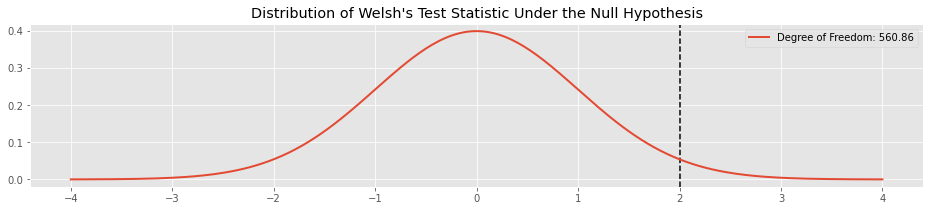

In [223]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis for respective analysis
x = np.linspace(-4, 4, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
plt.axvline(x=p_value_trump1, color='black', linestyle='dashed')
ax.plot(x, students_trump1.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df_trump1))
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x >= -t_test_clinton), color="black", alpha=0.99)
# _ = ax.fill_between(x, students_clinton.pdf(x), where=(x <= t_test_clinton), color="black", alpha=0.99)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

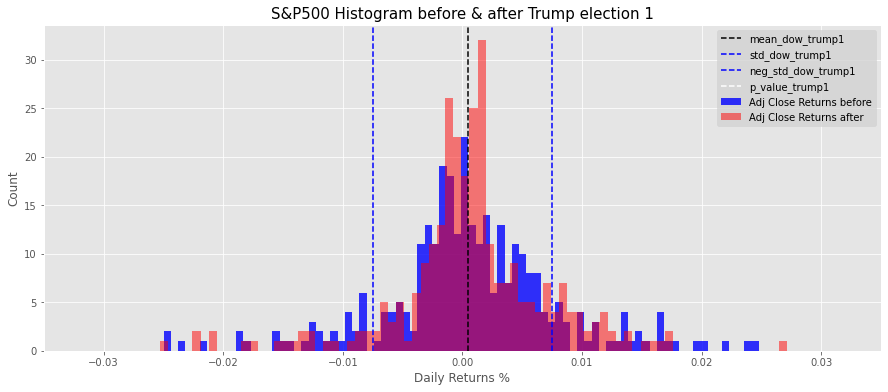

In [224]:
# Plotting of before and after election periods for respective president 
trumpbefore1['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns before', color='blue', alpha=0.8)
trumpafter1['Adj Close Daily Returns'].plot.hist(bins=100, figsize=(15, 6), label='Adj Close Returns after', color='red', alpha=0.5)

plt.axvline(x=mean_dow_trump1, color='black', linestyle='dashed', label='mean_dow_trump1')
plt.axvline(x=std_dow_trump1, color='blue', linestyle='dashed', label='std_dow_trump1')
plt.axvline(x=-std_dow_trump1, color='blue', linestyle='dashed', label='neg_std_dow_trump1')
plt.axvline(x=p_value_trump1, color='white', linestyle='dashed', label='p_value_trump1')

plt.title("S&P500 Histogram before & after Trump election 1", size=15)
plt.xlabel("Daily Returns %", size=12)
plt.xlim(-0.035, 0.035)
plt.ylabel("Count", size=12)

plt.legend(fontsize=14, loc='upper right')
legend= plt.legend()
frame = legend.get_frame()
frame.set_facecolor('lightgrey')

In [225]:
print(p_value_d(0))

{'P-value failed to Reject our Null Hypotheses': 10, 'P-value rejects our Null Hypotheses': 8}
